<style>
/* Main Title */
h1 {
    color: #1E293B;
    text-align: center;
    font-weight: 800;
    margin-top: 20px;
}

/* Subtitle */
h3 {
    text-align: center;
    color: #2F855A;
    font-weight: 500;
}

/* Section Headers */
h2 {
    color: #2F855A;
    border-bottom: 3px solid #2F855A;
    padding-bottom: 6px;
    margin-top: 50px;
}

/* Insight Box */
.insight-box {
    background-color: #F6E7D8;
    padding: 18px;
    border-left: 6px solid #2F855A;
    border-radius: 8px;
    margin: 20px 0;
    font-size: 15px;
}

/* Alert Box */
.alert-box {
    background-color: #FFF5F0;
    padding: 18px;
    border-left: 6px solid #C05621;
    border-radius: 8px;
    margin: 20px 0;
    font-weight: 500;
}

/* Dashboard Cards */
.metric-card {
    background-color: #F8FAFC;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0px 4px 12px rgba(0,0,0,0.05);
    width: 240px;
}
</style>


<div style="text-align:center; padding:10px;">
    <h1><b>Predicting County-Level Food Insecurity in Kenya Using Machine Learning</b></h1>
    <h3>Early Warning System for Acute Food Crisis</h3>
    <p><strong> Capstone Project</strong></p>
    <p style="color:#334155; font-size:14px; margin-top:5px;">👤Author: Bleezy</p>
</div>
<hr style="height:3px;background-color:#2F855A;border:none;">


## <span style="color:#2E86C1;"><b> 1. Business Understanding </b></span>

### **1.1 Background**

Food shortages remain a <span style="color:#C0392B;"><b>serious and persistent challenge</b></span> in Kenya.  
Each year, millions of people struggle to access sufficient and nutritious food.

Approximately <span style="color:#8E44AD;"><b>80% of Kenya’s land</b></span> consists of 
<b>Arid and Semi-Arid Lands (ASALs)</b>, home to more than 
<span style="color:#8E44AD;"><b>10 million people</b></span>.

<span style="color:#D35400;">Key Characteristics of ASAL Areas</span>

- 🌧️ Low and unpredictable rainfall  
- 🌱 Poor agricultural conditions  
- 🐄 Heavy dependence on livestock  
- 🌵 High vulnerability to drought

The IPC system (Integrated Food Security Phase Classification) is used worldwide to 
measure food insecurity. It classifies food insecurity into <b>5 phases</b>: 

| Phase | Classification | Meaning |
|-------|---------------|----------|
| 1 | <span style="color:#27AE60;"><b>Minimal</b></span> | Food needs are met |
| 2 | <span style="color:#F39C12;"><b>Stressed</b></span> | Households struggle |
| 3 | <span style="color:#E67E22;"><b>Crisis</b></span> | Urgent assistance required |
| 4 | <span style="color:#E74C3C;"><b>Emergency</b></span> | Severe food gaps |
| 5 | <span style="color:#922B21;"><b>Famine</b></span> | Extreme starvation |


> <span style="color:#C0392B;"><b>Phase 3 or higher = Immediate humanitarian intervention required.</b></span>

In Kenya, IPC assessments are done twice a year by organizations like:

- NDMA  (National Drought Management Authority)
- FAO   (Food and Agriculture Organization)
- WFP   (World Food Programme)

These reports describe the <b>current situation</b> but do <span style="color:#C0392B;"><b>not predict future crises</b></span>. 
This means: 
-  Help often arrives late  
-  Resources are mobilized after crisis escalation  
-  Preventive action becomes difficult  

Building a predictive system could enable:

- Early intervention  
- Better resource allocation  
- Reduced humanitarian impact

### **1.2 The Problem**

Kenya lacks a strong predictive system for food crises at the county level.

### Because of this:

- Delayed humanitarian response  
- Inefficient use of resources  
- Limited preventive action  
- Increased human suffering  
- Higher emergency costs 

> 💡 A predictive system could improve planning, prioritization, and coordination.


### **1.3 Project Goals**

 **Main Goal**

Build a **machine learning model** that predicts which counties will reach  
<span style="color:#C0392B;"><b>IPC Phase 3 or higher</b></span> within the next **1–3 months**.

**Model Inputs**

- Rainfall data  
- Food price data  
- Past IPC classifications  


**Additional Goals**

- Identify the main drivers of food insecurity  
- Measure prediction accuracy using public data  
- Create a simple tool for non-technical planners  
- Develop a framework applicable to other East African countries  


### **1.4 Stakeholders & Users**

| Stakeholder | Need | How Predictions Help |
|-------------|------|---------------------|
| WFP & FAO | Plan food delivery | 2–3 months advance warning |
| County Governments | Request funding | Early emergency planning |
| NGOs | Allocate limited funds | Prioritize high-risk areas |
| NDMA | Coordinate drought response | Support national planning |
| Donors (USAID, etc.) | Fund programs | Evidence-based funding decisions |


### **1.5 Measuring Success**

**Technical Success**

- ≥ 80% of real crises correctly predicted (**High Recall**)  
- ≥ 70% of predicted crises actually occur (**Good Precision**)  
- ROC-AUC ≥ 0.80  
- Predictions made 1–3 months in advance  

**Business Success**

- Clear explanation of why a county is at risk  
- Easy for non-technical users  
- Uses public, regularly updated data  
- Aligns with real-world humanitarian understanding  

### **1.6 Expected Benefits**

**Cost Savings**

Early action significantly reduces costs.

***Savings Include:***

- Lower emergency procurement costs  
- Improved transport planning  
- Fewer livestock deaths  
- Reduced long-term poverty  

 **Human Impact**

- Prevent crisis escalation into famine  
- Reduce child malnutrition  
- Protect livelihoods  
- Minimize long-term economic damage  



**Operational Benefits**

- Stronger inter-agency coordination  
- Faster response times  
- Better funding justification  
- Shift from emergency response to resilience building  

## <span style="color:#2E86C1;"><b>2. Data Understanding<b></span>

### **2.1 Import Libraries**
<p>Before we begin, we load all the tools required for this project.</p>



In [6]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time handling
from datetime import datetime
import calendar

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings for better visualization
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)       # Show up to 100 rows

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

print("✓ All libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

✓ All libraries loaded successfully!
Pandas version: 2.1.4
Numpy version: 1.26.4


### **2.2. Load Data**
<p>Load all five datasets into the notebook for analysis.</p>

<p><strong>Datasets Overview:</strong></p>
<ul>
<li><strong>IPC Data</strong> – Records of food insecurity levels (our target variable)</li>
<li><strong>Rainfall Data</strong> – Climate patterns and rainfall measurements</li>
<li><strong>Food Prices</strong> – Market-level prices indicating supply and accessibility</li>
<li><strong>Conflict Data</strong> – Geolocated records of violence and unrest</li>
<li><strong>MPI Data</strong> – Multidimensional Poverty Index (MPI) showing socioeconomic vulnerability</li>



In [8]:
# Set the path where your data files are located
data_path = '../data/raw/'

print("\033[1;34mLoading datasets...\033[0m\n")  # Blue bold header

# 1. Load IPC Data (Food Insecurity)
print("\033[1;32m1. Loading IPC data...\033[0m")  # Green bold
ipc_df = pd.read_csv(data_path + 'ipc_ken_area_long.csv')
print(f"   ✓ Loaded {len(ipc_df):,} rows")

# 2. Load Rainfall Data
print("\n\033[1;32m2. Loading Rainfall data...\033[0m")
rainfall_df = pd.read_csv(data_path + 'ken-rainfall-subnat-full.csv')
print(f"   ✓ Loaded {len(rainfall_df):,} rows")

# 3. Load Food Prices Data
print("\n\033[1;32m3. Loading Food Prices data...\033[0m")
prices_df = pd.read_csv(data_path + 'wfp_food_prices_ken.csv', skiprows=1)
print(f"   ✓ Loaded {len(prices_df):,} rows")

# 4. Load Conflict Data (Excel)
print("\n\033[1;32m4. Loading Conflict data...\033[0m")
conflict_df = pd.read_excel(
    data_path + 'kenya_political_violence_events_and_fatalities_by_month-year_as-of-11feb2026.xlsx',
    sheet_name='Data'
)
print(f"   ✓ Loaded {len(conflict_df):,} rows")

# 5. Load MPI Data (Poverty Index)
print("\n\033[1;32m5. Loading MPI (Poverty) data...\033[0m")
mpi_df = pd.read_csv(data_path + 'ken_mpi.csv', skiprows=1)
print(f"   ✓ Loaded {len(mpi_df):,} rows")

print("\033[1;34m✓ ALL DATASETS LOADED Sawa sawa!\033[0m")


Loading datasets...

1. Loading IPC data...
   ✓ Loaded 4,522 rows

2. Loading Rainfall data...
   ✓ Loaded 131,544 rows

3. Loading Food Prices data...
   ✓ Loaded 17,364 rows

4. Loading Conflict data...
   ✓ Loaded 350 rows

5. Loading MPI (Poverty) data...
   ✓ Loaded 48 rows
✓ ALL DATASETS LOADED Sawa sawa!


### **2.3 Initial Data Exploration**

<div class="insight-box">
<p>We will preview the first few rows of each dataset to better understand the structure, columns, and sample values.</p>
</div>


#### **2.3.1 IPC Dataset Overview**

The IPC dataset provides county-level food insecurity assessments, including historical and projected phases of food insecurity as shown below.  

| <span style="color:#1F618D;">#</span> | <span style="color:#1F618D;">Column Name</span> | <span style="color:#1F618D;">Description</span> |
|----|--------------------|-------------|
| 1 | <b>Date of analysis</b> | Date when the IPC assessment was conducted and the report written |
| 2 | <b>Country</b> | Country code (always `KEN` for Kenya) |
| 3 | <b>Total country population</b> | Total population of the analyzed area (county or region) |
| 4 | <b>Level 1</b> | Administrative level name (often blank; not used in our analysis) |
| 5 | <b>Area</b> | Name of the county or region being analyzed |
| 6 | <b>Validity period</b> | Indicates whether this is a current assessment or a future projection:  


In [11]:
# =======================
# IPC Data Overview
# =======================
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m1. IPC DATA (Food Insecurity Levels)\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {ipc_df.shape[0]} rows × {ipc_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(ipc_df.head())

# Column names
print("\nColumn names:")
print(ipc_df.columns.tolist())


1. IPC DATA (Food Insecurity Levels)
Shape: 4522 rows × 11 columns

First 5 rows:


,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage
0,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,all,515000,1.00
1,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,3+,103000,0.20
2,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,1,128750,0.25
3,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,2,283250,0.55
4,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,3,103000,0.20



Column names:
['Date of analysis', 'Country', 'Total country population', 'Level 1', 'Area', 'Validity period', 'From', 'To', 'Phase', 'Number', 'Percentage']


#### **🌧️2.3.2 Rainfall Data Overview**

The rainfall dataset contains dekadal (10-day period) satellite-derived rainfall measurements aggregated at administrative levels as shown below. 

| <span style="color:#1F618D;">#</span> | <span style="color:#1F618D;">Variable</span> | <span style="color:#1F618D;">Description</span> |
|----|-----------|-------------|
| 1 | <b>date</b> | Start date of the dekad (10-day period) |
| 2 | <b>adm_level</b> | Administrative level (`1` = County/Region, `2` = Sub-county) |
| 3 | <b>adm_id</b> | Unique administrative unit identification number |
| 4 | <b>PCODE</b> | Unique geographic place code (e.g., `KE019`) |
| 5 | <b>n_pixels</b> | Number of satellite pixels covering the administrative area |
| 6 | <b>rfh</b> | Observed rainfall for the dekad (millimeters) |
| 7 | <b>rfh_avg</b> | Long-term average rainfall for the same dekad (millimeters) |
| 8 | <b>r1h</b> | Cumulative 1-month rainfall (millimeters) |



In [13]:
# =======================
# Rainfall Data Overview
# =======================
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m2. RAINFALL DATA\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {rainfall_df.shape[0]} rows × {rainfall_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(rainfall_df.head())

# Column names
print("\nColumn names:")
print(rainfall_df.columns.tolist())


2. RAINFALL DATA
Shape: 131544 rows × 15 columns

First 5 rows:


,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,1981-01-01,1,51325,KE019,427.0,7.372365,15.759407,NaN,NaN,NaN,NaN,59.598840,NaN,NaN,final
1,1981-01-11,1,51325,KE019,427.0,4.325527,19.294770,NaN,NaN,NaN,NaN,38.384920,NaN,NaN,final
2,1981-01-21,1,51325,KE019,427.0,5.569087,16.265417,17.266980,51.319595,NaN,NaN,49.700817,39.536823,NaN,final
3,1981-02-01,1,51325,KE019,427.0,5.882904,12.719282,15.777517,48.279470,NaN,NaN,61.418427,38.997230,NaN,final
4,1981-02-11,1,51325,KE019,427.0,17.180328,18.768618,28.632318,47.753320,NaN,NaN,93.317700,63.753933,NaN,final



Column names:
['date', 'adm_level', 'adm_id', 'PCODE', 'n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q', 'version']


#### **2.3.3 Food Prices Dataset Overview**

The food prices dataset provides market-level price observations for various commodities across Kenya.  
These data are essential for understanding the economic drivers of food insecurity and are used as features in the predictive model.

| <span style="color:#1F618D;">#</span> | <span style="color:#1F618D;">Column Name</span> | <span style="color:#1F618D;">Description</span> |
|----|----------------|-------------|
| 1  | <b>date</b> | Date of price observation (YYYY-MM-DD) |
| 2  | <b>admin1</b> | Administrative region (7 old regions) |
| 3  | <b>admin2</b> | Sub-region / county |
| 4  | <b>market</b> | Market location name |
| 5  | <b>market_id</b> | Unique market identifier |
| 6  | <b>latitude</b> | Market GPS latitude |
| 7  | <b>longitude</b> | Market GPS longitude |
| 8  | <b>category</b> | Food category (cereals, pulses, etc.) |
| 9  | <b>commodity</b> | Specific food item (e.g., Maize, Beans) |
| 10 | <b>commodity_id</b> | Unique commodity code |
| 11 | <b>unit</b> | Measurement unit (KG, 90 KG bag, etc.) |
| 12 | <b>priceflag</b> | Data quality flag |
| 13 | <b>pricetype</b> | Wholesale or Retail price |
| 14 | <b>currency</b> | Local currency (KES) |
| 15 | <b>price</b> | Price in local currency (KES) |
| 16 | <b>usdprice</b> | Price in US Dollars |


In [15]:
# =======================
# Food Prices Data Overview
# =======================
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m3. FOOD PRICES DATA\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {prices_df.shape[0]} rows × {prices_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(prices_df.head())

# Column names
print("\nColumn names:")
print(prices_df.columns.tolist())


3. FOOD PRICES DATA
Shape: 17364 rows × 16 columns

First 5 rows:


,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
0,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,cereals and tubers,Maize,51,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,cereals and tubers,Maize (white),67,90 KG,actual,Wholesale,KES,1480.00,20.58
2,2006-01-15,Coast,Mombasa,Mombasa,191,-4.05,39.67,pulses and nuts,Beans,50,KG,actual,Wholesale,KES,33.63,0.47
3,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Maize (white),67,KG,actual,Retail,KES,17.00,0.24
4,2006-01-15,Eastern,Kitui,Kitui,187,-1.37,38.02,cereals and tubers,Sorghum,65,90 KG,actual,Wholesale,KES,1800.00,25.03



Column names:
['#date', '#adm1+name', '#adm2+name', '#loc+market+name', '#loc+market+code', '#geo+lat', '#geo+lon', '#item+type', '#item+name', '#item+code', '#item+unit', '#item+price+flag', '#item+price+type', '#currency+code', '#value', '#value+usd']


In [16]:
# =======================
# Conflict Data Overview
# =======================
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m4. CONFLICT DATA (Violence Events)\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {conflict_df.shape[0]} rows × {conflict_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(conflict_df.head())

# Column names
print("\nColumn names:")
print(conflict_df.columns.tolist())


4. CONFLICT DATA (Violence Events)
Shape: 350 rows × 5 columns

First 5 rows:


,Country,Month,Year,Events,Fatalities
0,Kenya,January,1997,3,6
1,Kenya,February,1997,3,9
2,Kenya,March,1997,6,179
3,Kenya,April,1997,4,7
4,Kenya,May,1997,4,22



Column names:
['Country', 'Month', 'Year', 'Events', 'Fatalities']


In [17]:
# =======================
# MPI Data Overview
# =======================
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m5. MPI DATA (Poverty Levels)\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m")

# Shape
print(f"Shape: {mpi_df.shape[0]} rows × {mpi_df.shape[1]} columns\n")

# Preview first 5 rows
print("First 5 rows:")
display(mpi_df.head())

# Column names
print("\nColumn names:")
print(mpi_df.columns.tolist())


5. MPI DATA (Poverty Levels)
Shape: 48 rows × 11 columns

First 5 rows:


,#country+code,#adm1+code,#adm1+name,#indicator+mpi,#indicator+headcount_ratio,#indicator+intensity_of_deprivation,#indicator+vulnerable_to_poverty,#indicator+in_severe_poverty,#meta+survey,#date+start,#date+end
0,KEN,NaN,NaN,0.1134,25.3523,44.7108,26.4044,7.4594,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
1,KEN,KE001,Mombasa,0.0518,12.8866,40.2193,16.8930,2.2801,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
2,KEN,KE002,Kwale,0.2105,44.5123,47.2996,27.2794,17.2902,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
3,KEN,KE003,Kilifi,0.2026,46.3581,43.7119,23.8772,13.1869,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00
4,KEN,KE004,Tana River,0.3780,67.2861,56.1740,18.3876,44.4231,DHS,2022-01-01 00:00:00+00:00,2022-12-31 23:59:59+00:00



Column names:
['#country+code', '#adm1+code', '#adm1+name', '#indicator+mpi', '#indicator+headcount_ratio', '#indicator+intensity_of_deprivation', '#indicator+vulnerable_to_poverty', '#indicator+in_severe_poverty', '#meta+survey', '#date+start', '#date+end']


In [18]:
# Create a summary of all datasets
datasets_info = {
    'Dataset': ['IPC (Food Insecurity)', 'Rainfall', 'Food Prices', 'Conflict', 'MPI (Poverty)'],
    'Rows': [len(ipc_df), len(rainfall_df), len(prices_df), len(conflict_df), len(mpi_df)],
    'Columns': [len(ipc_df.columns), len(rainfall_df.columns), len(prices_df.columns), 
                len(conflict_df.columns), len(mpi_df.columns)]
}

summary_df = pd.DataFrame(datasets_info)

# Styled header
print("\033[1;34m" + "="*60 + "\033[0m")
print("\033[1;34mDATASET SUMMARY\033[0m")
print("\033[1;34m" + "="*60 + "\033[0m")

# Display the summary table
display(summary_df)

# Total rows across all datasets
print(f"\nTotal rows across all datasets: {summary_df['Rows'].sum():,}")


DATASET SUMMARY


,Dataset,Rows,Columns
0,IPC (Food Insecurity),4522,11
1,Rainfall,131544,15
2,Food Prices,17364,16
3,Conflict,350,5
4,MPI (Poverty),48,11



Total rows across all datasets: 153,828


### **2.4 Data Quality Check**

#### 2.4.1 Check Data Types & Missing Values - IPC



In [21]:
# =======================
# 4.2 Check Data Types & Missing Values - IPC
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m1. IPC DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  # Yellow header
print(ipc_df.dtypes)

# Missing values
missing_ipc = ipc_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_ipc.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_ipc[missing_ipc > 0])

# Missing value percentage
total_missing = ipc_df.isnull().sum().sum()
total_cells = ipc_df.shape[0] * ipc_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")


1. IPC DATA - Info and Missing Values

Data Types:
Date of analysis             object
Country                      object
Total country population      int64
Level 1                      object
Area                         object
Validity period              object
From                         object
To                           object
Phase                        object
Number                        int64
Percentage                  float64
dtype: object

Missing Values:
Level 1    1610
dtype: int64

Missing percentage: 3.24%


#### 2.4.2 Rainfall Data Types & Missing Values

In [23]:
# =======================
# 4.2 Check Data Types & Missing Values - Rainfall
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m2. RAINFALL DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  # Yellow header
print(rainfall_df.dtypes)

# Missing values
missing_rain = rainfall_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_rain.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_rain[missing_rain > 0])

# Missing value percentage
total_missing = rainfall_df.isnull().sum().sum()
total_cells = rainfall_df.shape[0] * rainfall_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")


2. RAINFALL DATA - Info and Missing Values

Data Types:
date          object
adm_level      int64
adm_id         int64
PCODE         object
n_pixels     float64
rfh          float64
rfh_avg      float64
r1h          float64
r1h_avg      float64
r3h          float64
r3h_avg      float64
rfq          float64
r1q          float64
r3q          float64
version       object
dtype: object

Missing Values:
r1h        162
r1h_avg    162
r3h        648
r3h_avg    648
r1q        162
r3q        648
dtype: int64

Missing percentage: 0.12%


#### 2.4.3 Food prices Data Types & Missing Values

In [25]:
# =======================
# 4.2 Check Data Types & Missing Values - Food Prices
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m3. FOOD PRICES DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  # Yellow header
print(prices_df.dtypes)

# Missing values
missing_prices = prices_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_prices.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_prices[missing_prices > 0])

# Missing value percentage
total_missing = prices_df.isnull().sum().sum()
total_cells = prices_df.shape[0] * prices_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")


3. FOOD PRICES DATA - Info and Missing Values

Data Types:
#date                object
#adm1+name           object
#adm2+name           object
#loc+market+name     object
#loc+market+code      int64
#geo+lat            float64
#geo+lon            float64
#item+type           object
#item+name           object
#item+code            int64
#item+unit           object
#item+price+flag     object
#item+price+type     object
#currency+code       object
#value              float64
#value+usd          float64
dtype: object

Missing Values:
#adm1+name    50
#adm2+name    50
#geo+lat      50
#geo+lon      50
dtype: int64

Missing percentage: 0.07%


In [26]:
# Check actual column names in prices_df
print("Column names in prices_df:")
print(prices_df.columns.tolist())

Column names in prices_df:
['#date', '#adm1+name', '#adm2+name', '#loc+market+name', '#loc+market+code', '#geo+lat', '#geo+lon', '#item+type', '#item+name', '#item+code', '#item+unit', '#item+price+flag', '#item+price+type', '#currency+code', '#value', '#value+usd']



#### 2.4.4 Conflict Data Types & Missing Values

In [28]:
# =======================
# 4.2 Check Data Types & Missing Values - Conflict
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m4. CONFLICT DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  # Yellow header
print(conflict_df.dtypes)

# Missing values
missing_conflict = conflict_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_conflict.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_conflict[missing_conflict > 0])

# Missing value percentage
total_missing = conflict_df.isnull().sum().sum()
total_cells = conflict_df.shape[0] * conflict_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")


4. CONFLICT DATA - Info and Missing Values

Data Types:
Country       object
Month         object
Year           int64
Events         int64
Fatalities     int64
dtype: object

Missing Values:
✓ No missing values!

Missing percentage: 0.00%


#### 2.4.5 MPI Data Types & Missing Values

In [30]:
# =======================
# 4.2 Check Data Types & Missing Values - MPI
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34m5. MPI DATA - Info and Missing Values\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Data types
print("\033[1;33mData Types:\033[0m")  # Yellow header
print(mpi_df.dtypes)

# Missing values
missing_mpi = mpi_df.isnull().sum()
print("\n\033[1;33mMissing Values:\033[0m")
if missing_mpi.sum() == 0:
    print("✓ No missing values!")
else:
    print(missing_mpi[missing_mpi > 0])

# Missing value percentage
total_missing = mpi_df.isnull().sum().sum()
total_cells = mpi_df.shape[0] * mpi_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"\nMissing percentage: {missing_percentage:.2f}%")


5. MPI DATA - Info and Missing Values

Data Types:
#country+code                           object
#adm1+code                              object
#adm1+name                              object
#indicator+mpi                         float64
#indicator+headcount_ratio             float64
#indicator+intensity_of_deprivation    float64
#indicator+vulnerable_to_poverty       float64
#indicator+in_severe_poverty           float64
#meta+survey                            object
#date+start                             object
#date+end                               object
dtype: object

Missing Values:
#adm1+code    1
#adm1+name    1
dtype: int64

Missing percentage: 0.38%


### 2.5 **Basic Statistics**

#### 2.5.1 IPC Data

In [33]:
# =======================
#  Basic Statistics - IPC Data
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mIPC DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(ipc_df.describe())


IPC DATA - Statistical Summary



,Total country population,Number,Percentage
count,4.522000e+03,4.522000e+03,4522.000000
mean,1.603694e+07,1.987975e+05,0.306347
std,1.079520e+06,2.899369e+05,0.344474
min,1.388144e+07,0.000000e+00,0.000000
25%,1.515218e+07,0.000000e+00,0.000000
50%,1.661700e+07,7.885000e+04,0.150000
75%,1.661700e+07,2.680020e+05,0.450000
max,1.790982e+07,1.577335e+06,1.000000


#### 2.5.2 Rainfall Data

In [35]:
# =======================
# Basic Statistics - Rainfall Data
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mRAINFALL DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(rainfall_df.describe())


RAINFALL DATA - Statistical Summary



,adm_level,adm_id,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q
count,131544.000000,131544.000000,131544.000000,131544.000000,131544.000000,131382.000000,131382.000000,130896.000000,130896.000000,131544.000000,131382.000000,130896.000000
mean,1.901235,52031.049383,457.962963,31.660675,30.945180,95.053785,92.923584,285.738097,278.942779,101.535986,101.622794,102.174143
std,0.298348,3054.654585,1007.072725,33.554252,22.425579,82.330986,63.801213,186.729623,153.399693,58.847724,47.449597,36.749438
min,1.000000,51325.000000,10.000000,0.000000,0.000000,0.175904,0.449237,2.139759,3.654337,9.762118,10.142180,15.911969
25%,2.000000,51345.000000,31.000000,7.173302,13.146297,30.231770,43.208694,138.574680,159.248900,62.904640,70.349533,78.376366
50%,2.000000,51365.000000,70.000000,20.421646,27.449320,74.578945,84.123810,259.145325,268.148070,90.170180,93.945730,97.291840
75%,2.000000,51385.000000,311.000000,45.090908,44.684128,138.706545,133.981600,403.485965,388.407300,121.772941,122.011882,118.613502
max,2.000000,68770.000000,5604.000000,476.275850,131.643330,975.482800,332.292140,1495.413700,740.640200,770.968750,571.586730,460.272060


#### 2.5.2 Food Prices Data

In [37]:
# =======================
#  Basic Statistics - Food Prices Data
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mFOOD PRICES DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(prices_df.describe())


FOOD PRICES DATA - Statistical Summary



,#loc+market+code,#geo+lat,#geo+lon,#item+code,#value,#value+usd
count,17364.000000,17314.000000,17314.000000,17364.000000,17364.000000,17364.000000
mean,3968.962797,0.677603,36.973523,291.947996,1369.549790,12.592478
std,3171.609080,2.285165,2.011423,294.003509,2606.960335,23.259702
min,184.000000,-4.660000,34.360000,50.000000,5.000000,0.039000
25%,1850.000000,-1.270000,34.860000,67.000000,67.500000,0.600000
50%,3254.000000,0.190000,36.790000,148.000000,136.000000,1.060000
75%,5670.000000,3.240000,38.660000,440.000000,1389.160000,13.560000
max,10509.000000,4.620000,41.860000,937.000000,18252.000000,150.950000


#### 2.5.3 Conflict Data

In [39]:
# =======================
# Basic Statistics - Conflict Data
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mCONFLICT DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(conflict_df.describe())


CONFLICT DATA - Statistical Summary



,Year,Events,Fatalities
count,350.000000,350.000000,350.000000
mean,2011.085714,27.702857,41.554286
std,8.430982,32.054802,47.350261
min,1997.000000,0.000000,0.000000
25%,2004.000000,8.000000,12.000000
50%,2011.000000,15.000000,29.000000
75%,2018.000000,29.000000,58.750000
max,2026.000000,175.000000,539.000000


#### 2.5.4 MPI Data

In [41]:
# =======================
# Basic Statistics - MPI Data
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")  # Blue header
print("\033[1;34mMPI DATA - Statistical Summary\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Display descriptive statistics
display(mpi_df.describe())


MPI DATA - Statistical Summary



,#indicator+mpi,#indicator+headcount_ratio,#indicator+intensity_of_deprivation,#indicator+vulnerable_to_poverty,#indicator+in_severe_poverty
count,48.000000,48.000000,48.000000,48.00000,48.000000
mean,0.152240,32.107352,43.979956,26.99845,12.248000
std,0.120417,19.724275,6.251215,9.21059,16.516930
min,0.010300,2.671200,37.766800,9.21130,0.221300
25%,0.078500,19.149225,40.000075,18.34410,2.342800
50%,0.108250,25.707150,40.998600,27.20630,5.313800
75%,0.194100,40.455875,45.955325,33.44040,12.004975
max,0.496800,81.335900,62.447900,43.37600,64.885500


### **2.6 Unique Values in Key Columns**

In [43]:
# =======================
# Unique Values - IPC Data Areas
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mIPC DATA - Unique Areas\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# Count of unique areas
num_areas = ipc_df['Area'].nunique()
print(f"Total unique areas: {num_areas}\n")

# List of areas sorted alphabetically
print("List of areas:")
for area in sorted(ipc_df['Area'].unique()):
    print(f"- {area}")


IPC DATA - Unique Areas

Total unique areas: 54

List of areas:
- BANGLADESH
- Baringo
- DANDORA
- Elgeyo-Marakwet
- Embu
- Embu (Mbeere)
- GITHURAI
- Garissa
- Homabay
- Isiolo
- KANGEMI
- KAWANGWARE
- KAYOLE
- KIBRA
- KONDELE
- Kajiado
- Kiambu
- Kilifi
- Kitui
- Kwale
- Laikipia
- Lamu
- Lamu county
- MATHARE
- MUKURU
- MWEMBE TAYARI
- Machakos
- Makueni
- Mandera
- Marsabit
- Marsabit - laisamis
- Marsabit - moyale
- Marsabit - north horr
- Marsabit - saku
- Meru
- Migori
- Narok
- Nyeri
- OBUNGA
- Samburu
- TANA RIVER
- Taita
- Taita taveta
- Tana river
- Tharaka
- Tharaka-nithi
- Turkana
- Turkana central
- Turkana east-kibish-loima
- Turkana north
- Turkana south
- Turkana west
- Wajir
- West pokot


In [44]:
# =======================
# Unique Values - IPC Phases
# =======================

# Styled header
print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mIPC DATA - Unique Phases (Food Insecurity Levels)\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# List unique phases
unique_phases = ipc_df['Phase'].unique()
print("Unique IPC Phases:")
for phase in sorted(unique_phases):
    print(f"- {phase}")

# Distribution of each phase
print("\nPhase distribution:")
display(ipc_df['Phase'].value_counts().sort_index())


IPC DATA - Unique Phases (Food Insecurity Levels)

Unique IPC Phases:
- 1
- 2
- 3
- 3+
- 4
- 5
- all

Phase distribution:


Phase
1      646
2      646
3      646
3+     646
4      646
5      646
all    646
Name: count, dtype: int64

<h3>4.5 Date Ranges for Each Dataset</h3>

In [ ]:
# =======================
# 4.5 Date Ranges for Each Dataset
# =======================

print("\033[1;34m" + "="*80 + "\033[0m")
print("\033[1;34mDATE RANGES FOR EACH DATASET\033[0m")
print("\033[1;34m" + "="*80 + "\033[0m\n")

# 1 IPC Data
print("\033[1;33m1. IPC Data\033[0m")
ipc_date_col = ipc_df.columns[0]
print(f"Date column: {ipc_date_col}")
print(f"Sample dates: {ipc_df[ipc_date_col].unique()[:5]}")

# 2 Rainfall Data
print("\n\033[1;33m2. Rainfall Data\033[0m")
print(f"Date range: {rainfall_df['date'].min()} to {rainfall_df['date'].max()}")

# 3 Food Prices Data
print("\n\033[1;33m3. Food Prices Data\033[0m")
print(f"Date range: {prices_df['#date'].min()} to {prices_df['#date'].max()}")

# 4 Conflict Data
print("\n\033[1;33m4. Conflict Data\033[0m")
print(f"Year range: {conflict_df['Year'].min()} to {conflict_df['Year'].max()}")
print(f"Months included: {sorted(conflict_df['Month'].unique())}")


DATE RANGES FOR EACH DATASET

1. IPC Data
Date column: Date of analysis
Sample dates: ['Jul 2025' 'Feb 2025' 'Jul 2024' 'Feb 2024' 'Jul 2023']

2. Rainfall Data
Date range: 1981-01-01 to 2026-02-01

3. Food Prices Data
Date range: 2006-01-15 to 2025-11-15

4. Conflict Data
Year range: 1997 to 2026
Months included: ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']


## **2.6 Exploratory Data Analysis**

### **2.6.1: UNIVARIATE ANALYSIS**
- Looking at one variable at a time

#### 2.6.1.1 IPC Phase 3+ (Target Variable)

In [50]:
# Clean IPC
ipc_df['From_date'] = pd.to_datetime(ipc_df['From'])
ipc_df['Percentage_num'] = pd.to_numeric(ipc_df['Percentage'], errors='coerce')

#  Filter IPC dataset for Phase 3+ observations
phase3_data = ipc_df[ipc_df['Phase'] == '3+'].copy()

# Summary statistics
total_obs = len(phase3_data)
unique_counties = phase3_data['Area'].nunique()
date_min = phase3_data['From_date'].min()
date_max = phase3_data['From_date'].max()

# Display results
print(f"Total Phase 3+ observations: {total_obs:,}")
print(f" Counties with Phase 3+ data: {unique_counties}")
print(f"Date range: {date_min} to {date_max}")


Total Phase 3+ observations: 646
 Counties with Phase 3+ data: 54
Date range: 2019-07-01 00:00:00 to 2025-10-01 00:00:00


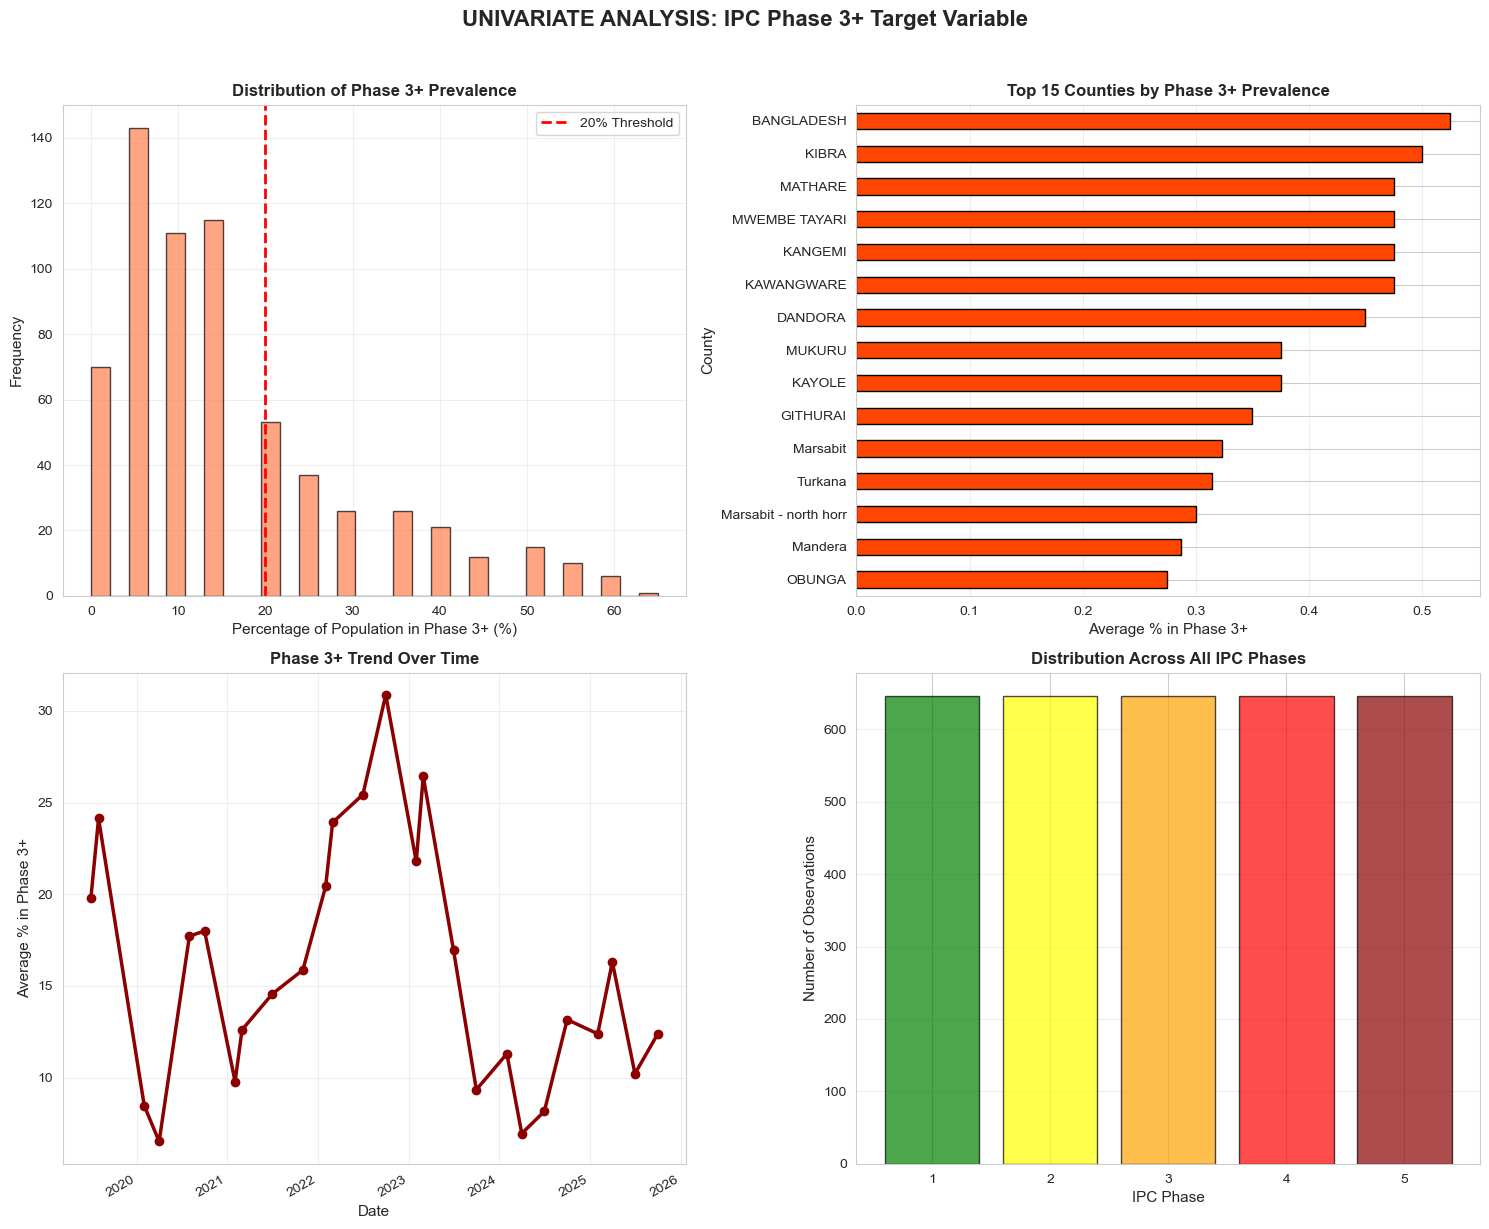

In [51]:
# Univariate Analysis: IPC Phase 3+ Target Variable
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS: IPC Phase 3+ Target Variable', fontsize=16, fontweight='bold', y=1.02)

# 1 Distribution of Phase 3+ percentages
ax1 = axes[0, 0]
ax1.hist(phase3_data['Percentage_num'] * 100, bins=30, 
         color='coral', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Percentage of Population in Phase 3+ (%)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distribution of Phase 3+ Prevalence', fontsize=12, fontweight='bold')
ax1.axvline(20, color='red', linestyle='--', linewidth=2, label='20% Threshold')
ax1.legend()
ax1.grid(alpha=0.3)

# 2 Top counties by Phase 3+ prevalence
ax2 = axes[0, 1]
county_phase3 = phase3_data.groupby('Area')['Percentage_num'].mean().sort_values(ascending=False).head(15)
county_phase3.plot(kind='barh', ax=ax2, color='orangered', edgecolor='black')
ax2.set_xlabel('Average % in Phase 3+', fontsize=11)
ax2.set_ylabel('County', fontsize=11)
ax2.set_title('Top 15 Counties by Phase 3+ Prevalence', fontsize=12, fontweight='bold')
ax2.invert_yaxis()  # highest values on top
ax2.grid(axis='x', alpha=0.3)

# 3 Phase 3+ trend over time
ax3 = axes[1, 0]
phase3_time = phase3_data.groupby('From_date')['Percentage_num'].mean() * 100
phase3_time.plot(ax=ax3, color='darkred', linewidth=2.5, marker='o')
ax3.set_xlabel('Date', fontsize=11)
ax3.set_ylabel('Average % in Phase 3+', fontsize=11)
ax3.set_title('Phase 3+ Trend Over Time', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# 4 Distribution across all IPC phases
ax4 = axes[1, 1]
all_phase_counts = ipc_df[ipc_df['Phase'].isin(['1','2','3','4','5'])]['Phase'].value_counts().sort_index()
ax4.bar(all_phase_counts.index, all_phase_counts.values, 
        color=['green', 'yellow', 'orange', 'red', 'darkred'], 
        edgecolor='black', alpha=0.7)
ax4.set_xlabel('IPC Phase', fontsize=11)
ax4.set_ylabel('Number of Observations', fontsize=11)
ax4.set_title('Distribution Across All IPC Phases', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


#### 2.6.1.2 Rainfall Patterns

In [53]:
# Clean rainfall
rainfall_df['date_parsed'] = pd.to_datetime(rainfall_df['date'])
# Get recent rainfall data
rain_recent = rainfall_df[rainfall_df['date_parsed'] >= '2020-01-01'].copy()

print(f"Recent rainfall observations: {len(rain_recent):,}")
print(f"\nRainfall summary statistics:")
print(rain_recent[['rfh', 'r1h', 'r3h', 'r3q']].describe())


Recent rainfall observations: 17,820

Rainfall summary statistics:
                rfh           r1h           r3h           r3q
count  17820.000000  17820.000000  17820.000000  17820.000000
mean      36.135944    108.912239    334.398856    117.591151
std       38.891556     95.634536    219.551212     41.711471
min        0.000000      0.262651      2.734940     25.420523
25%        7.934018     34.186007    158.353193     89.292303
50%       23.300000     85.399997    303.285890    111.168068
75%       51.567857    158.403825    479.564665    138.476675
max      476.275850    975.482800   1495.413700    432.723900


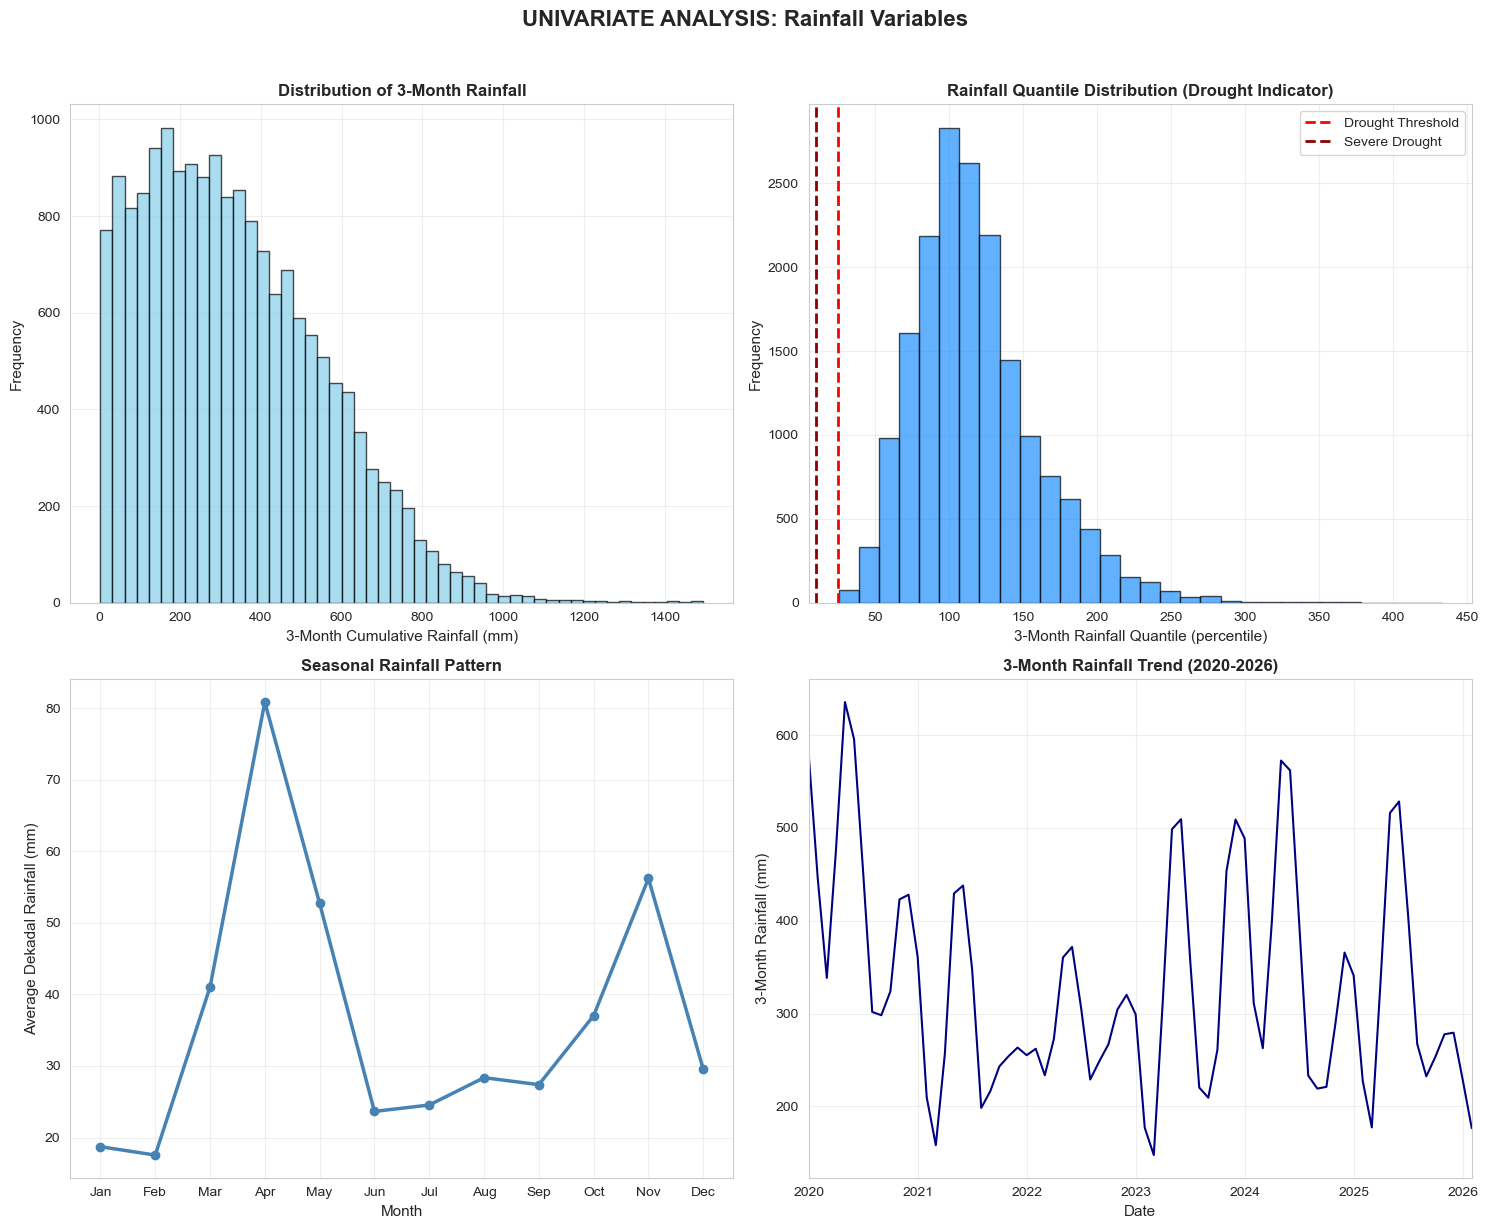

In [54]:
# Univariate Analysis: Rainfall Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS: Rainfall Variables', fontsize=16, fontweight='bold', y=1.02)

# 1 Distribution of 3-month cumulative rainfall
ax1 = axes[0, 0]
ax1.hist(rain_recent['r3h'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('3-Month Cumulative Rainfall (mm)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distribution of 3-Month Rainfall', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# 2 Rainfall quantile (drought indicator)
ax2 = axes[0, 1]
ax2.hist(rain_recent['r3q'].dropna(), bins=30, color='dodgerblue', edgecolor='black', alpha=0.7)
ax2.set_xlabel('3-Month Rainfall Quantile (percentile)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Rainfall Quantile Distribution (Drought Indicator)', fontsize=12, fontweight='bold')
ax2.axvline(25, color='red', linestyle='--', linewidth=2, label='Drought Threshold')
ax2.axvline(10, color='darkred', linestyle='--', linewidth=2, label='Severe Drought')
ax2.legend()
ax2.grid(alpha=0.3)

# 3 Seasonal rainfall pattern
ax3 = axes[1, 0]
# Extract month for seasonality
rain_recent['month'] = rain_recent['date_parsed'].dt.month
monthly_rain = rain_recent.groupby('month')['rfh'].mean()
ax3.plot(monthly_rain.index, monthly_rain.values, marker='o', linewidth=2.5, color='steelblue')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Average Dekadal Rainfall (mm)', fontsize=11)
ax3.set_title('Seasonal Rainfall Pattern', fontsize=12, fontweight='bold')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3.grid(alpha=0.3)

# 4 Recent trends in 3-month rainfall
ax4 = axes[1, 1]
rain_monthly = rain_recent.groupby(rain_recent['date_parsed'].dt.to_period('M'))['r3h'].mean()
rain_monthly.plot(ax=ax4, color='navy', linewidth=1.5)
ax4.set_xlabel('Date', fontsize=11)
ax4.set_ylabel('3-Month Rainfall (mm)', fontsize=11)
ax4.set_title('3-Month Rainfall Trend (2020-2026)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


#### 2.6.1.3 Food Prices

In [56]:
#minor cleaning
# Remove header/invalid rows if present
prices_clean = prices_df[prices_df['#date'] != '#date'].copy()

# Convert price column to numeric, coerce errors to NaN
prices_clean['price_num'] = pd.to_numeric(prices_clean['#value'], errors='coerce')

# Parse date column into datetime
prices_clean['date_parsed'] = pd.to_datetime(prices_clean['#date'], errors='coerce')
#Price statistics for cleaned dataset

# Total number of observations
total_obs = len(prices_clean)

# Number of unique commodities
unique_commodities = prices_clean['#item+name'].nunique()

# Top 10 commodities by observation count
top_commodities = prices_clean['#item+name'].value_counts().head(10)

# Display results
print(f"💰 Total price observations: {total_obs:,}")
print(f"🥦 Commodities tracked: {unique_commodities}\n")

print("📊 Top 10 commodities by observation count:")
print(top_commodities)


💰 Total price observations: 17,364
🥦 Commodities tracked: 50

📊 Top 10 commodities by observation count:
#item+name
Maize (white)       1234
Beans (dry)         1151
Maize               1114
Beans                946
Potatoes (Irish)     887
Salt                 809
Wheat flour          808
Sugar                788
Sorghum              705
Rice (aromatic)      590
Name: count, dtype: int64


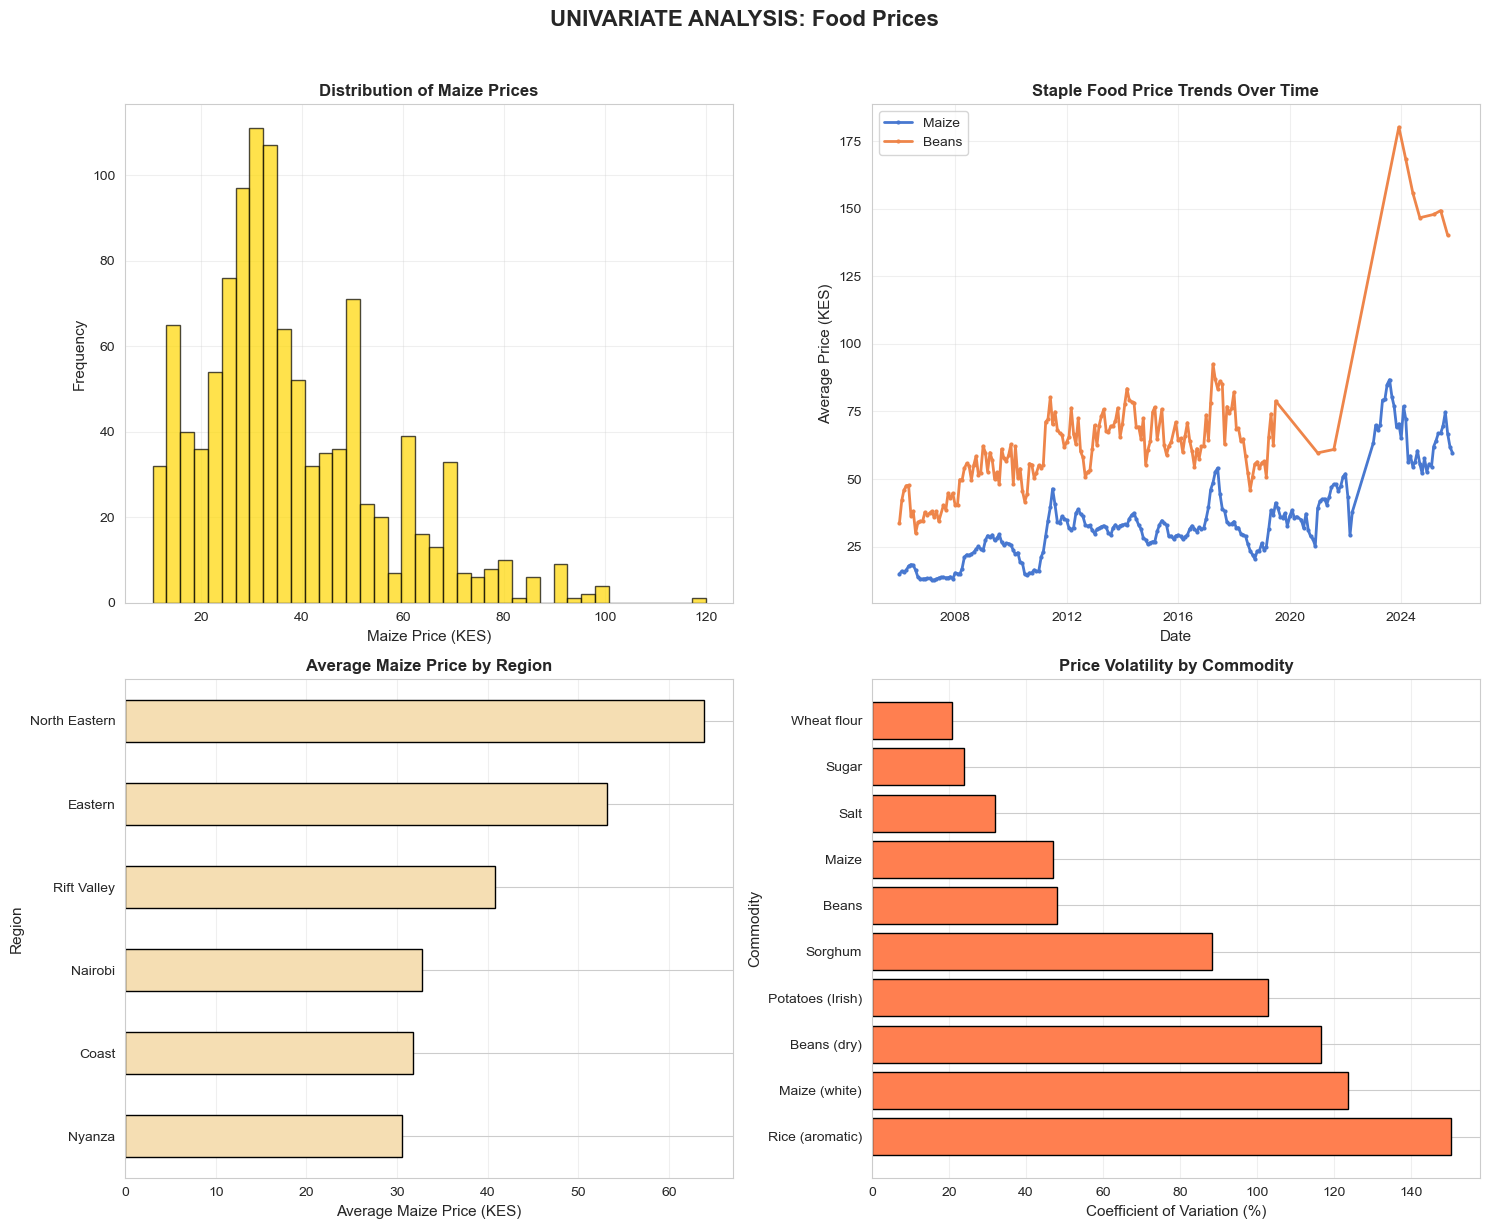

In [57]:
# Univariate Analysis: Food Prices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS: Food Prices', fontsize=16, fontweight='bold', y=1.02)

# 1 Maize price distribution
ax1 = axes[0, 0]
maize_prices = prices_clean[prices_clean['#item+name'] == 'Maize']['price_num'].dropna()
ax1.hist(maize_prices, bins=40, color='gold', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Maize Price (KES)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distribution of Maize Prices', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# 2 Staple food price trends over time
ax2 = axes[0, 1]
for commodity in ['Maize', 'Beans']:
    commodity_data = prices_clean[prices_clean['#item+name'] == commodity].copy()
    monthly_avg = commodity_data.groupby(commodity_data['date_parsed'].dt.to_period('M'))['price_num'].mean()
    ax2.plot(monthly_avg.index.to_timestamp(), monthly_avg.values, 
             label=commodity, linewidth=2, marker='o', markersize=2)
ax2.set_xlabel('Date', fontsize=11)
ax2.set_ylabel('Average Price (KES)', fontsize=11)
ax2.set_title('Staple Food Price Trends Over Time', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 3 Regional price variation (Maize)
ax3 = axes[1, 0]
region_prices = prices_clean[prices_clean['#item+name'] == 'Maize'].groupby('#adm1+name')['price_num'].mean().sort_values()
region_prices.plot(kind='barh', ax=ax3, color='wheat', edgecolor='black')
ax3.set_xlabel('Average Maize Price (KES)', fontsize=11)
ax3.set_ylabel('Region', fontsize=11)
ax3.set_title('Average Maize Price by Region', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4 Price volatility for top commodities
ax4 = axes[1, 1]
top_commodities = prices_clean['#item+name'].value_counts().head(10).index
volatility = []

for commodity in top_commodities:
    comm_prices = prices_clean[prices_clean['#item+name'] == commodity]['price_num'].dropna()
    if len(comm_prices) > 0:
        cv = (comm_prices.std() / comm_prices.mean()) * 100
        volatility.append((commodity, cv))

volatility_df = pd.DataFrame(volatility, columns=['Commodity', 'CV']).sort_values('CV', ascending=False)
ax4.barh(volatility_df['Commodity'], volatility_df['CV'], color='coral', edgecolor='black')
ax4.set_xlabel('Coefficient of Variation (%)', fontsize=11)
ax4.set_ylabel('Commodity', fontsize=11)
ax4.set_title('Price Volatility by Commodity', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


#### 2.6.1.4. Poverty & Political Violence

In [59]:
# minor cleaning for MPI dataset
# 1 Remove header/invalid rows
mpi_clean = mpi_df[mpi_df['#country+code'] != '#country+code'].copy()

# 2 Convert key MPI columns to numeric
mpi_clean['MPI_num'] = pd.to_numeric(mpi_clean['#indicator+mpi'], errors='coerce')
mpi_clean['Headcount_num'] = pd.to_numeric(mpi_clean['#indicator+headcount_ratio'], errors='coerce')
mpi_clean['Severe_Poverty_num'] = pd.to_numeric(mpi_clean['#indicator+in_severe_poverty'], errors='coerce')
# Clean violence
conflict_df['date'] = pd.to_datetime(conflict_df['Year'].astype(str) + '-' + conflict_df['Month'].astype(str) + '-01')

# 1 MPI Indicators
print("🌍 MPI Statistics:")
mpi_stats = mpi_clean[['MPI_num', 'Headcount_num', 'Severe_Poverty_num']].describe()
print(mpi_stats)

# 2 Conflict / Violence Indicators
print("\n⚔️ Conflict Statistics:")
if 'conflict_df' in globals() and not conflict_df.empty:
    # Ensure the numeric columns exist
    cols = [col for col in ['Events', 'Fatalities'] if col in conflict_df.columns]
    if cols:
        conflict_stats = conflict_df[cols].describe()
        print(conflict_stats)
    else:
        print("⚠️ Conflict dataset has no numeric columns ('Events' or 'Fatalities').")
else:
    print("⚠️ Conflict dataset is empty or missing. No statistics to display.")


🌍 MPI Statistics:
         MPI_num  Headcount_num  Severe_Poverty_num
count  48.000000      48.000000           48.000000
mean    0.152240      32.107352           12.248000
std     0.120417      19.724275           16.516930
min     0.010300       2.671200            0.221300
25%     0.078500      19.149225            2.342800
50%     0.108250      25.707150            5.313800
75%     0.194100      40.455875           12.004975
max     0.496800      81.335900           64.885500

⚔️ Conflict Statistics:
           Events  Fatalities
count  350.000000  350.000000
mean    27.702857   41.554286
std     32.054802   47.350261
min      0.000000    0.000000
25%      8.000000   12.000000
50%     15.000000   29.000000
75%     29.000000   58.750000
max    175.000000  539.000000


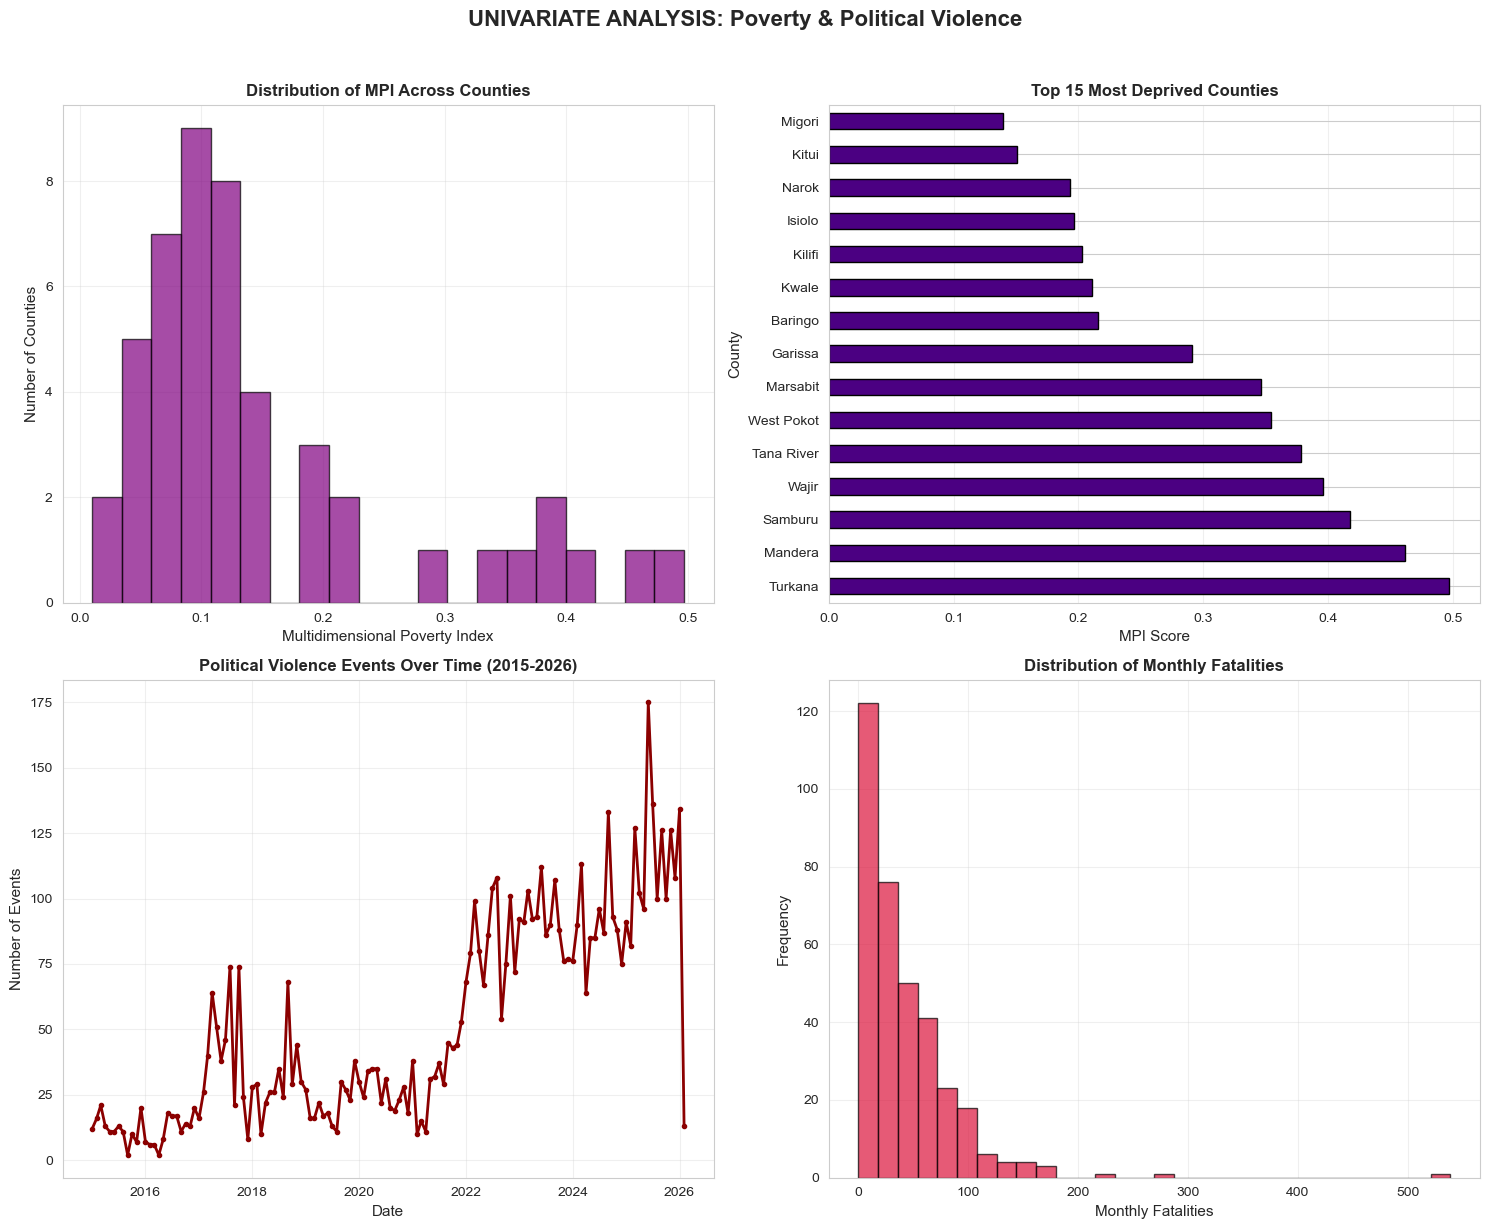

In [60]:
#  Univariate Analysis: Poverty & Political Violence
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS: Poverty & Political Violence', fontsize=16, fontweight='bold', y=1.02)

# 1 MPI distribution
ax1 = axes[0, 0]
ax1.hist(mpi_clean['MPI_num'].dropna(), bins=20, color='purple', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Multidimensional Poverty Index', fontsize=11)
ax1.set_ylabel('Number of Counties', fontsize=11)
ax1.set_title('Distribution of MPI Across Counties', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# 2 Top 15 most deprived counties
ax2 = axes[0, 1]
top_poor = mpi_clean.nlargest(15, 'MPI_num')[['#adm1+name', 'MPI_num']].set_index('#adm1+name')
top_poor.plot(kind='barh', ax=ax2, color='indigo', edgecolor='black', legend=False)
ax2.set_xlabel('MPI Score', fontsize=11)
ax2.set_ylabel('County', fontsize=11)
ax2.set_title('Top 15 Most Deprived Counties', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3 Conflict events over time
ax3 = axes[1, 0]
if 'conflict_df' in globals() and not conflict_df.empty and 'date' in conflict_df.columns and 'Events' in conflict_df.columns:
    conflict_recent = conflict_df[conflict_df['date'] >= pd.to_datetime('2015-01-01')]
    ax3.plot(conflict_recent['date'], conflict_recent['Events'], 
             color='darkred', linewidth=2, marker='o', markersize=3)
    ax3.set_xlabel('Date', fontsize=11)
    ax3.set_ylabel('Number of Events', fontsize=11)
    ax3.set_title('Political Violence Events Over Time (2015-2026)', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'No conflict data available', fontsize=12, color='darkred',
             ha='center', va='center')
    ax3.set_axis_off()

# 4 Fatalities distribution
ax4 = axes[1, 1]
if 'conflict_df' in globals() and not conflict_df.empty and 'Fatalities' in conflict_df.columns:
    ax4.hist(conflict_df['Fatalities'].dropna(), bins=30, color='crimson', edgecolor='black', alpha=0.7)
    ax4.set_xlabel('Monthly Fatalities', fontsize=11)
    ax4.set_ylabel('Frequency', fontsize=11)
    ax4.set_title('Distribution of Monthly Fatalities', fontsize=12, fontweight='bold')
    ax4.grid(alpha=0.3)
else:
    ax4.text(0.5, 0.5, 'No fatalities data available', fontsize=12, color='crimson',
             ha='center', va='center')
    ax4.set_axis_off()

# Adjust layout
plt.tight_layout()
plt.show()


### **2.6.2: BIVARIATE ANALYSIS**
-  Looking at relationships between variables

In [62]:
# Create aggregated monthly datasets
print("Preparing data for bivariate analysis...")

# Phase 3+ monthly average
phase3_monthly = ipc_df[ipc_df['Phase'] == '3+'].copy()
phase3_monthly['year_month'] = phase3_monthly['From_date'].dt.to_period('M')
phase3_monthly_avg = phase3_monthly.groupby('year_month')['Percentage_num'].mean().reset_index()

# Rainfall monthly average
rain_sample = rainfall_df[rainfall_df['date_parsed'] >= '2020-01-01'].copy()
rain_sample['year_month'] = rain_sample['date_parsed'].dt.to_period('M')
rain_monthly_avg = rain_sample.groupby('year_month').agg({'r3q': 'mean', 'r3h': 'mean'}).reset_index()

# Maize prices monthly
maize_data = prices_clean[prices_clean['#item+name'] == 'Maize'].copy()
maize_data['year_month'] = maize_data['date_parsed'].dt.to_period('M')
maize_monthly = maize_data.groupby('year_month')['price_num'].mean().reset_index()

# Violence monthly
violence_monthly = conflict_df.copy()
violence_monthly['year_month'] = violence_monthly['date'].dt.to_period('M')

print("✅ Data prepared!")

Preparing data for bivariate analysis...
✅ Data prepared!


#### 2.6.2.1: Rainfall vs Food Insecurity

In [64]:
# Merge rainfall and Phase 3+ data
merged = pd.merge(rain_monthly_avg, phase3_monthly_avg, on='year_month', how='inner')

print(f"Merged observations: {len(merged)}")
print(f"\nCorrelation between rainfall quantile and Phase 3+:")
print(f"r3q vs Phase3+: {merged['r3q'].corr(merged['Percentage_num']):.3f}")


Merged observations: 24

Correlation between rainfall quantile and Phase 3+:
r3q vs Phase3+: -0.474


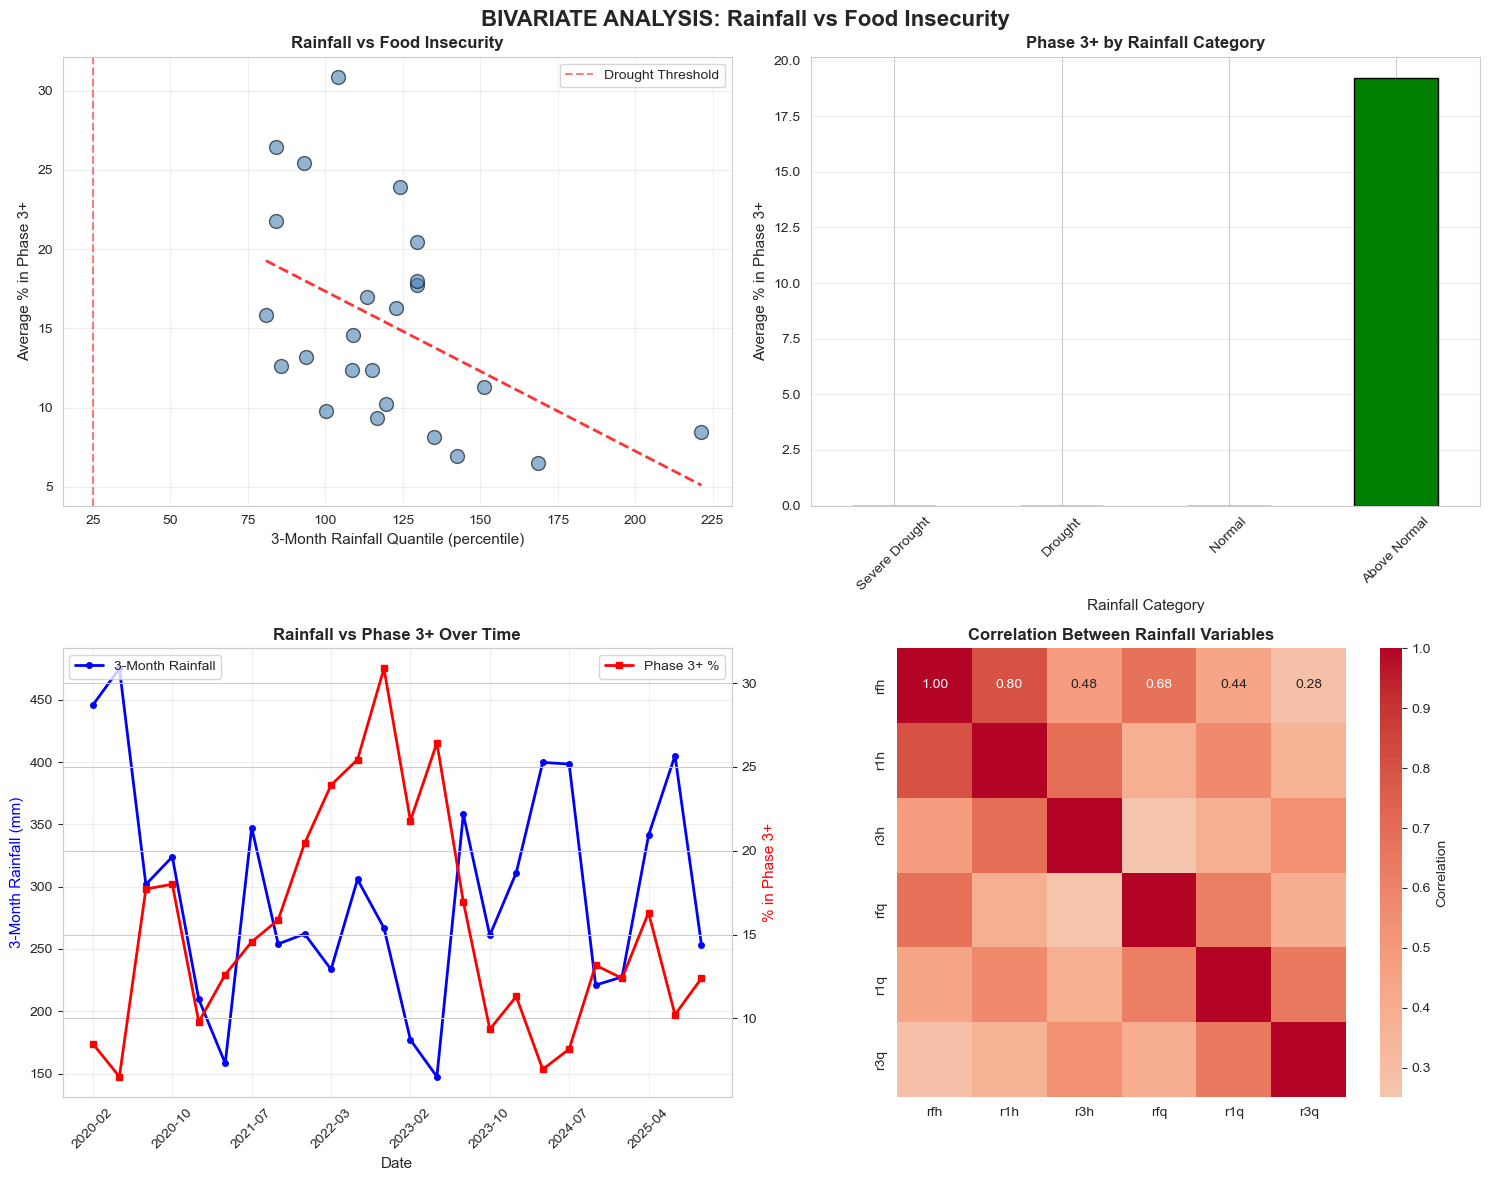

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BIVARIATE ANALYSIS: Rainfall vs Food Insecurity', fontsize=16, fontweight='bold')

# 1. Scatter plot: Rainfall quantile vs Phase 3+
ax1 = axes[0, 0]
ax1.scatter(merged['r3q'], merged['Percentage_num'] * 100, 
           alpha=0.6, s=100, color='steelblue', edgecolor='black')
ax1.set_xlabel('3-Month Rainfall Quantile (percentile)', fontsize=11)
ax1.set_ylabel('Average % in Phase 3+', fontsize=11)
ax1.set_title('Rainfall vs Food Insecurity', fontsize=12, fontweight='bold')
ax1.axvline(25, color='red', linestyle='--', alpha=0.5, label='Drought Threshold')
ax1.legend()
ax1.grid(alpha=0.3)

# Add trend line
if len(merged) > 0:
    z = np.polyfit(merged['r3q'].dropna(), merged['Percentage_num'].dropna() * 100, 1)
    p = np.poly1d(z)
    ax1.plot(merged['r3q'].sort_values(), p(merged['r3q'].sort_values()), 
             "r--", alpha=0.8, linewidth=2, label='Trend')

# 2. Phase 3+ by rainfall category
ax2 = axes[0, 1]
merged['rainfall_cat'] = pd.cut(merged['r3q'], bins=[0, 10, 25, 75, 100], 
                                labels=['Severe Drought', 'Drought', 'Normal', 'Above Normal'])
rain_cat_phase = merged.groupby('rainfall_cat')['Percentage_num'].mean() * 100
rain_cat_phase.plot(kind='bar', ax=ax2, 
                   color=['darkred', 'orange', 'yellow', 'green'], edgecolor='black')
ax2.set_xlabel('Rainfall Category', fontsize=11)
ax2.set_ylabel('Average % in Phase 3+', fontsize=11)
ax2.set_title('Phase 3+ by Rainfall Category', fontsize=12, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Time series: Both variables together
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
merged_sorted = merged.sort_values('year_month')
ax3.plot(merged_sorted['year_month'].astype(str), merged_sorted['r3h'], 
        color='blue', linewidth=2, marker='o', markersize=4, label='3-Month Rainfall')
ax3_twin.plot(merged_sorted['year_month'].astype(str), merged_sorted['Percentage_num'] * 100, 
             color='red', linewidth=2, marker='s', markersize=4, label='Phase 3+ %')
ax3.set_xlabel('Date', fontsize=11)
ax3.set_ylabel('3-Month Rainfall (mm)', fontsize=11, color='blue')
ax3_twin.set_ylabel('% in Phase 3+', fontsize=11, color='red')
ax3.set_title('Rainfall vs Phase 3+ Over Time', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.grid(alpha=0.3)
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# 4. Correlation heatmap
ax4 = axes[1, 1]
rain_corr = rain_sample[['rfh', 'r1h', 'r3h', 'rfq', 'r1q', 'r3q']].corr()
sns.heatmap(rain_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax4,
           cbar_kws={'label': 'Correlation'}, square=True)
ax4.set_title('Correlation Between Rainfall Variables', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 2.6.2.2: Food Prices vs Food Insecurity

In [67]:
# Merge prices and Phase 3+
price_phase_merged = pd.merge(maize_monthly, phase3_monthly_avg, on='year_month', how='inner')

print(f"Merged observations: {len(price_phase_merged)}")
print(f"\nCorrelation: Maize price vs Phase 3+: {price_phase_merged['price_num'].corr(price_phase_merged['Percentage_num']):.3f}")

Merged observations: 24

Correlation: Maize price vs Phase 3+: -0.124


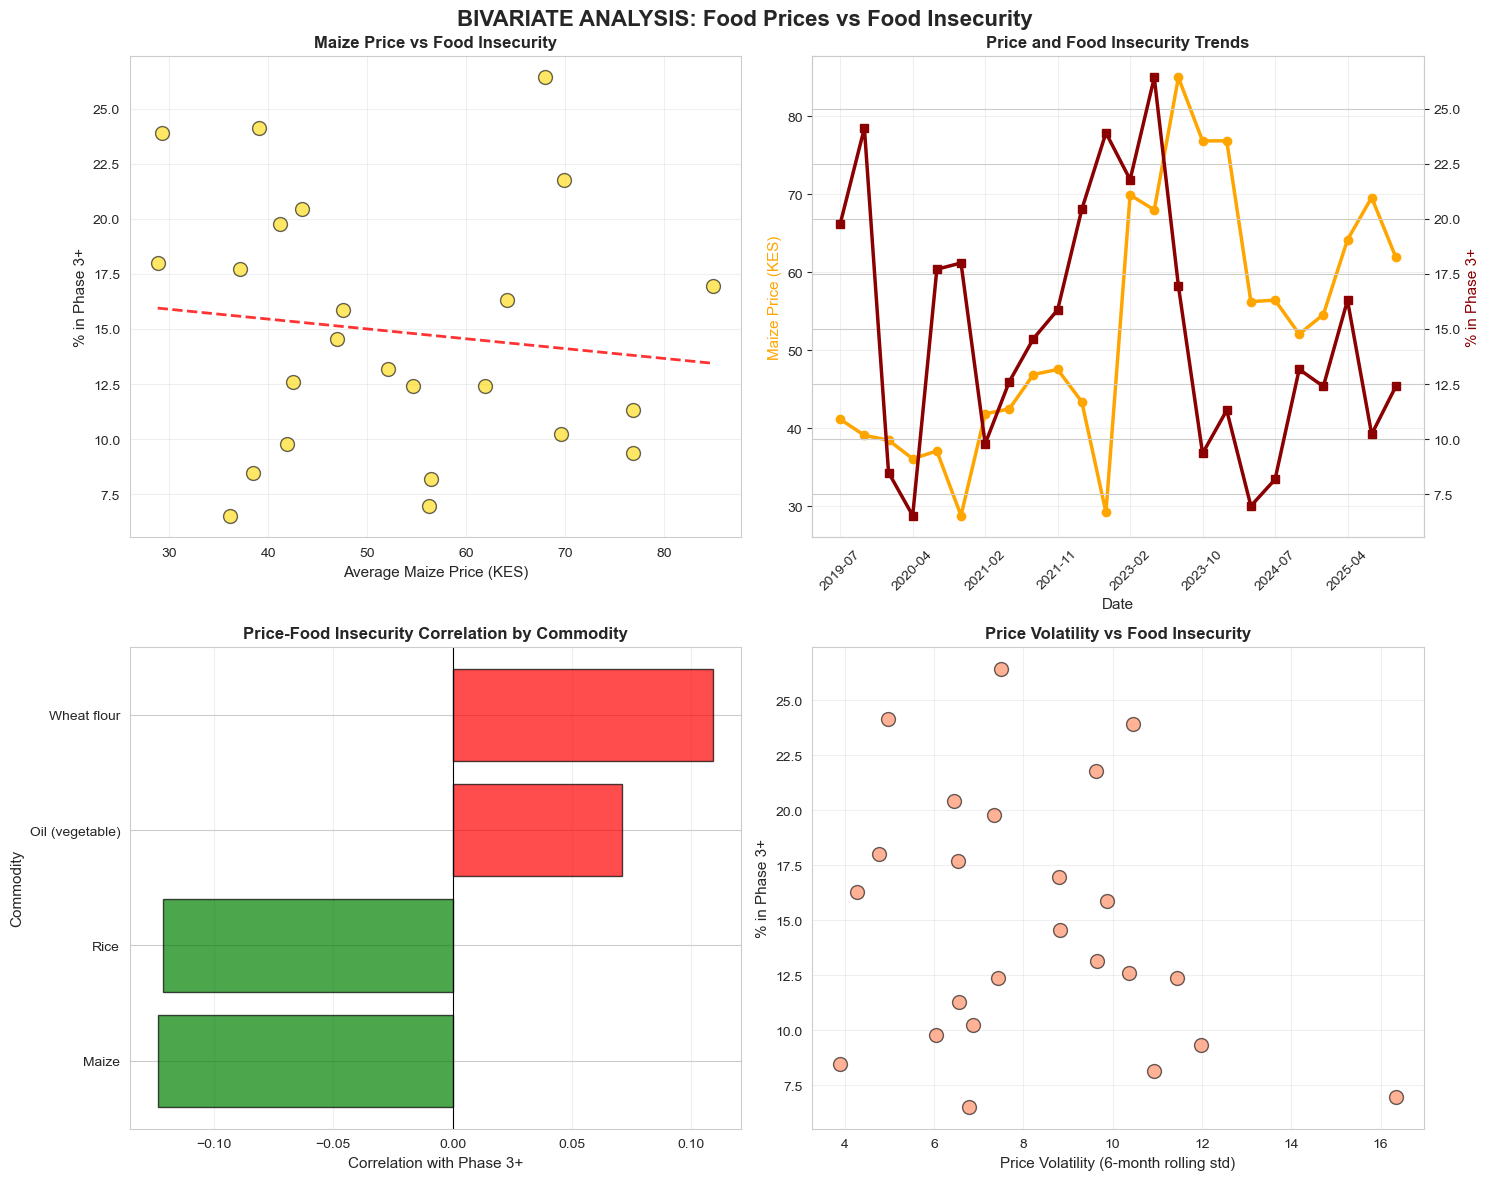

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BIVARIATE ANALYSIS: Food Prices vs Food Insecurity', fontsize=16, fontweight='bold')

# 1. Maize price vs Phase 3+
ax1 = axes[0, 0]
ax1.scatter(price_phase_merged['price_num'], price_phase_merged['Percentage_num'] * 100, 
           alpha=0.6, s=100, color='gold', edgecolor='black')
ax1.set_xlabel('Average Maize Price (KES)', fontsize=11)
ax1.set_ylabel('% in Phase 3+', fontsize=11)
ax1.set_title('Maize Price vs Food Insecurity', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Trend line
if len(price_phase_merged) > 0:
    z = np.polyfit(price_phase_merged['price_num'].dropna(), 
                  price_phase_merged['Percentage_num'].dropna() * 100, 1)
    p = np.poly1d(z)
    ax1.plot(price_phase_merged['price_num'].sort_values(), 
            p(price_phase_merged['price_num'].sort_values()), 
            "r--", alpha=0.8, linewidth=2)

# 2. Price and Phase 3+ trends together
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
recent_data = price_phase_merged.sort_values('year_month').tail(24)
ax2.plot(recent_data['year_month'].astype(str), recent_data['price_num'], 
        color='orange', linewidth=2.5, marker='o', label='Maize Price')
ax2_twin.plot(recent_data['year_month'].astype(str), recent_data['Percentage_num'] * 100,
             color='darkred', linewidth=2.5, marker='s', label='Phase 3+ %')
ax2.set_xlabel('Date', fontsize=11)
ax2.set_ylabel('Maize Price (KES)', fontsize=11, color='orange')
ax2_twin.set_ylabel('% in Phase 3+', fontsize=11, color='darkred')
ax2.set_title('Price and Food Insecurity Trends', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticks(ax2.get_xticks()[::3])
ax2.grid(alpha=0.3)

# 3. Correlation by commodity
ax3 = axes[1, 0]
correlations = []
for commodity in ['Maize', 'Beans', 'Rice', 'Oil (vegetable)', 'Wheat flour']:
    comm_data = prices_clean[prices_clean['#item+name'] == commodity].copy()
    comm_data['year_month'] = comm_data['date_parsed'].dt.to_period('M')
    comm_monthly = comm_data.groupby('year_month')['price_num'].mean().reset_index()
    merged_comm = pd.merge(comm_monthly, phase3_monthly_avg, on='year_month', how='inner')
    if len(merged_comm) > 5:
        corr = merged_comm['price_num'].corr(merged_comm['Percentage_num'])
        correlations.append((commodity, corr))

if correlations:
    corr_df = pd.DataFrame(correlations, columns=['Commodity', 'Correlation']).sort_values('Correlation')
    colors = ['green' if x < 0 else 'red' for x in corr_df['Correlation']]
    ax3.barh(corr_df['Commodity'], corr_df['Correlation'], color=colors, edgecolor='black', alpha=0.7)
    ax3.set_xlabel('Correlation with Phase 3+', fontsize=11)
    ax3.set_ylabel('Commodity', fontsize=11)
    ax3.set_title('Price-Food Insecurity Correlation by Commodity', fontsize=12, fontweight='bold')
    ax3.axvline(0, color='black', linestyle='-', linewidth=0.8)
    ax3.grid(axis='x', alpha=0.3)

# 4. Price volatility vs Phase 3+
ax4 = axes[1, 1]
maize_data_sorted = maize_data.sort_values('date_parsed')
maize_data_sorted['price_volatility'] = maize_data_sorted['price_num'].rolling(window=6).std()
maize_vol = maize_data_sorted.groupby('year_month')['price_volatility'].mean().reset_index()
vol_phase_merged = pd.merge(maize_vol, phase3_monthly_avg, on='year_month', how='inner')

ax4.scatter(vol_phase_merged['price_volatility'], vol_phase_merged['Percentage_num'] * 100,
           alpha=0.6, s=100, color='coral', edgecolor='black')
ax4.set_xlabel('Price Volatility (6-month rolling std)', fontsize=11)
ax4.set_ylabel('% in Phase 3+', fontsize=11)
ax4.set_title('Price Volatility vs Food Insecurity', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### 2.6.2.3 : Poverty vs Food Insecurity

In [70]:
# Prepare county-level data
county_phase3_avg = phase3_monthly.groupby('Area')['Percentage_num'].mean().reset_index()
county_phase3_avg.columns = ['County', 'Avg_Phase3_Pct']

# Normalize for matching
county_phase3_avg['County_lower'] = county_phase3_avg['County'].str.lower().str.strip()
mpi_clean['County_lower'] = mpi_clean['#adm1+name'].str.lower().str.strip()

# Merge
poverty_phase3 = pd.merge(county_phase3_avg, mpi_clean, on='County_lower', how='inner')

print(f"Counties matched: {len(poverty_phase3)}")
print(f"\nCorrelation: MPI vs Phase 3+: {poverty_phase3['MPI_num'].corr(poverty_phase3['Avg_Phase3_Pct']):.3f}")

Counties matched: 28

Correlation: MPI vs Phase 3+: 0.740


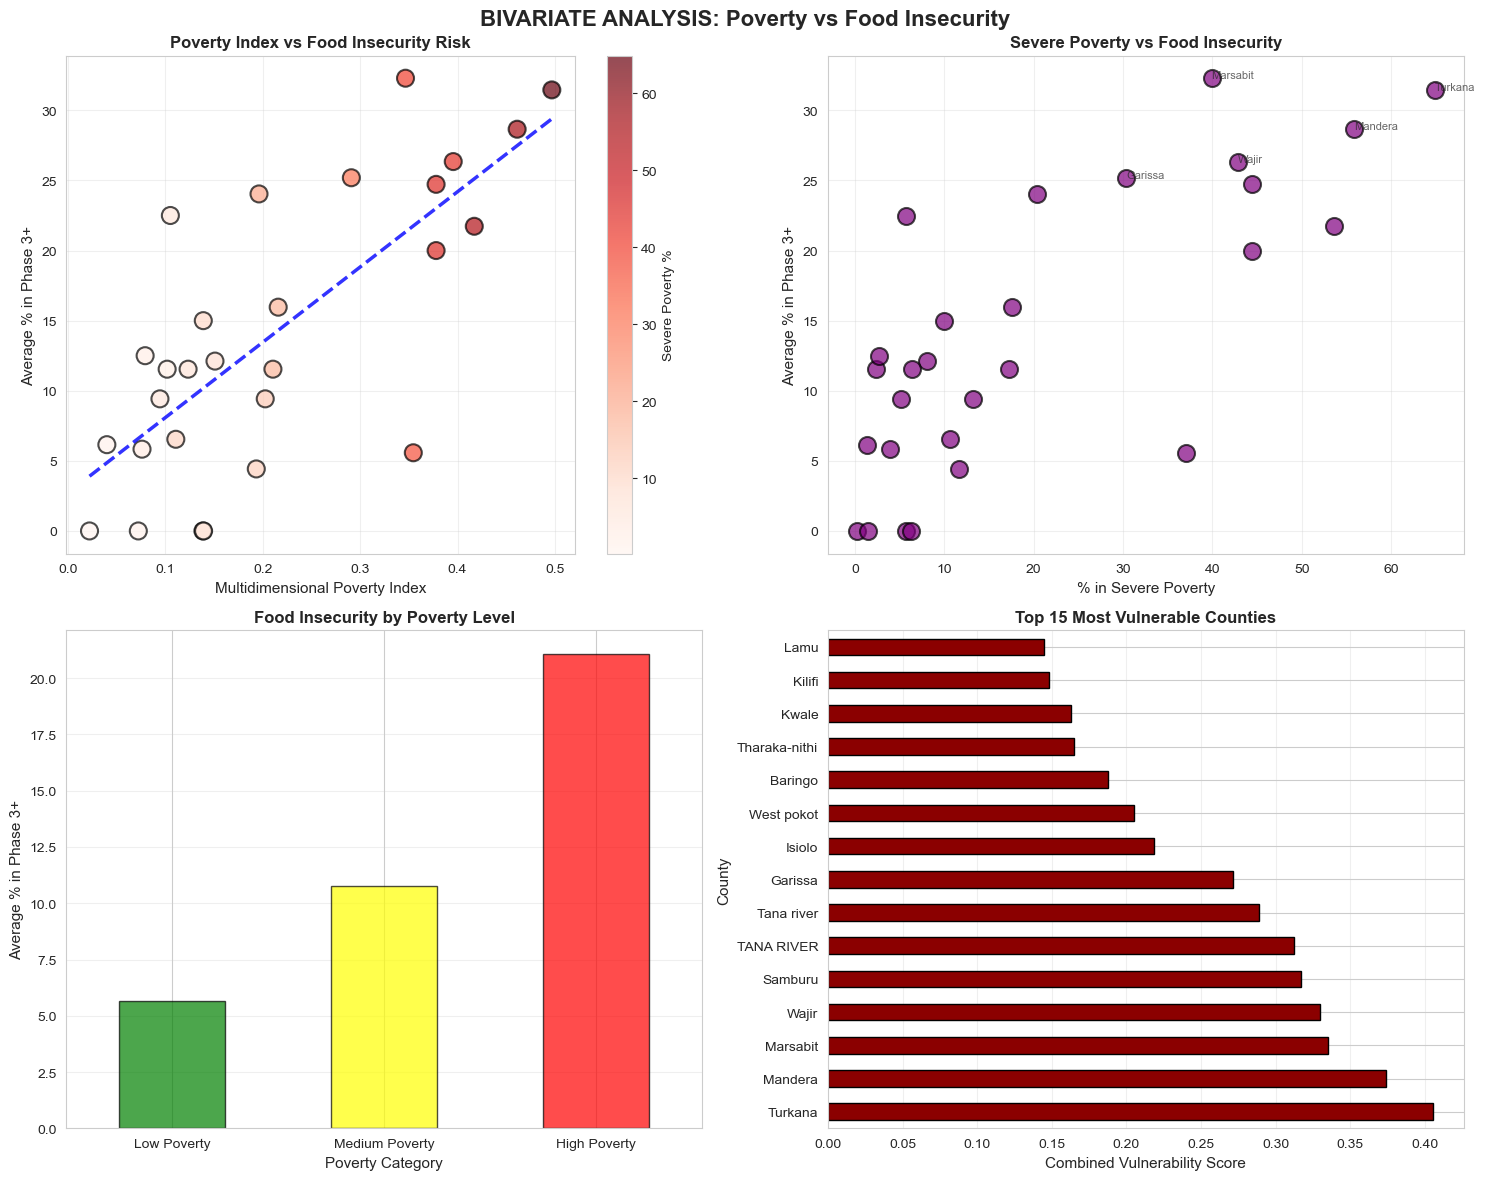

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BIVARIATE ANALYSIS: Poverty vs Food Insecurity', fontsize=16, fontweight='bold')

# 1. MPI vs Phase 3+
ax1 = axes[0, 0]
scatter = ax1.scatter(poverty_phase3['MPI_num'], poverty_phase3['Avg_Phase3_Pct'] * 100,
                     alpha=0.7, s=150, c=poverty_phase3['Severe_Poverty_num'], 
                     cmap='Reds', edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Multidimensional Poverty Index', fontsize=11)
ax1.set_ylabel('Average % in Phase 3+', fontsize=11)
ax1.set_title('Poverty Index vs Food Insecurity Risk', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Trend line
if len(poverty_phase3) > 0:
    z = np.polyfit(poverty_phase3['MPI_num'].dropna(), 
                  poverty_phase3['Avg_Phase3_Pct'].dropna() * 100, 1)
    p = np.poly1d(z)
    ax1.plot(poverty_phase3['MPI_num'].sort_values(), 
            p(poverty_phase3['MPI_num'].sort_values()), 
            "b--", alpha=0.8, linewidth=2.5)

plt.colorbar(scatter, ax=ax1, label='Severe Poverty %')

# 2. Severe poverty vs Phase 3+
ax2 = axes[0, 1]
ax2.scatter(poverty_phase3['Severe_Poverty_num'], poverty_phase3['Avg_Phase3_Pct'] * 100,
           alpha=0.7, s=150, color='purple', edgecolor='black', linewidth=1.5)
ax2.set_xlabel('% in Severe Poverty', fontsize=11)
ax2.set_ylabel('Average % in Phase 3+', fontsize=11)
ax2.set_title('Severe Poverty vs Food Insecurity', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# Label extremes
top_vulnerable = poverty_phase3.nlargest(5, 'Avg_Phase3_Pct')
for _, row in top_vulnerable.iterrows():
    ax2.annotate(row['County'], 
                (row['Severe_Poverty_num'], row['Avg_Phase3_Pct'] * 100),
                fontsize=8, alpha=0.7)

# 3. Phase 3+ by poverty category
ax3 = axes[1, 0]
poverty_phase3['Poverty_Category'] = pd.cut(poverty_phase3['MPI_num'], 
                                            bins=[0, 0.1, 0.2, 1],
                                            labels=['Low Poverty', 'Medium Poverty', 'High Poverty'])
poverty_cat_phase = poverty_phase3.groupby('Poverty_Category')['Avg_Phase3_Pct'].mean() * 100
poverty_cat_phase.plot(kind='bar', ax=ax3, color=['green', 'yellow', 'red'], 
                      edgecolor='black', alpha=0.7)
ax3.set_xlabel('Poverty Category', fontsize=11)
ax3.set_ylabel('Average % in Phase 3+', fontsize=11)
ax3.set_title('Food Insecurity by Poverty Level', fontsize=12, fontweight='bold')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(axis='y', alpha=0.3)

# 4. Top vulnerable counties
ax4 = axes[1, 1]
poverty_phase3['Risk_Score'] = (poverty_phase3['MPI_num'] * 0.5 + 
                                poverty_phase3['Avg_Phase3_Pct'] * 0.5)
top_risk = poverty_phase3.nlargest(15, 'Risk_Score')[['County', 'Risk_Score']].set_index('County')
top_risk.plot(kind='barh', ax=ax4, color='darkred', edgecolor='black', legend=False)
ax4.set_xlabel('Combined Vulnerability Score', fontsize=11)
ax4.set_ylabel('County', fontsize=11)
ax4.set_title('Top 15 Most Vulnerable Counties', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

#### 2.6.2.4 : Political Violence vs Food Insecurity

In [73]:
# Merge violence and Phase 3+
violence_phase3 = pd.merge(violence_monthly[['year_month', 'Events', 'Fatalities']], 
                          phase3_monthly_avg, on='year_month', how='inner')

print(f"Merged observations: {len(violence_phase3)}")
print(f"\nCorrelations:")
print(f"Events vs Phase 3+: {violence_phase3['Events'].corr(violence_phase3['Percentage_num']):.3f}")
print(f"Fatalities vs Phase 3+: {violence_phase3['Fatalities'].corr(violence_phase3['Percentage_num']):.3f}")

Merged observations: 26

Correlations:
Events vs Phase 3+: 0.096
Fatalities vs Phase 3+: 0.099


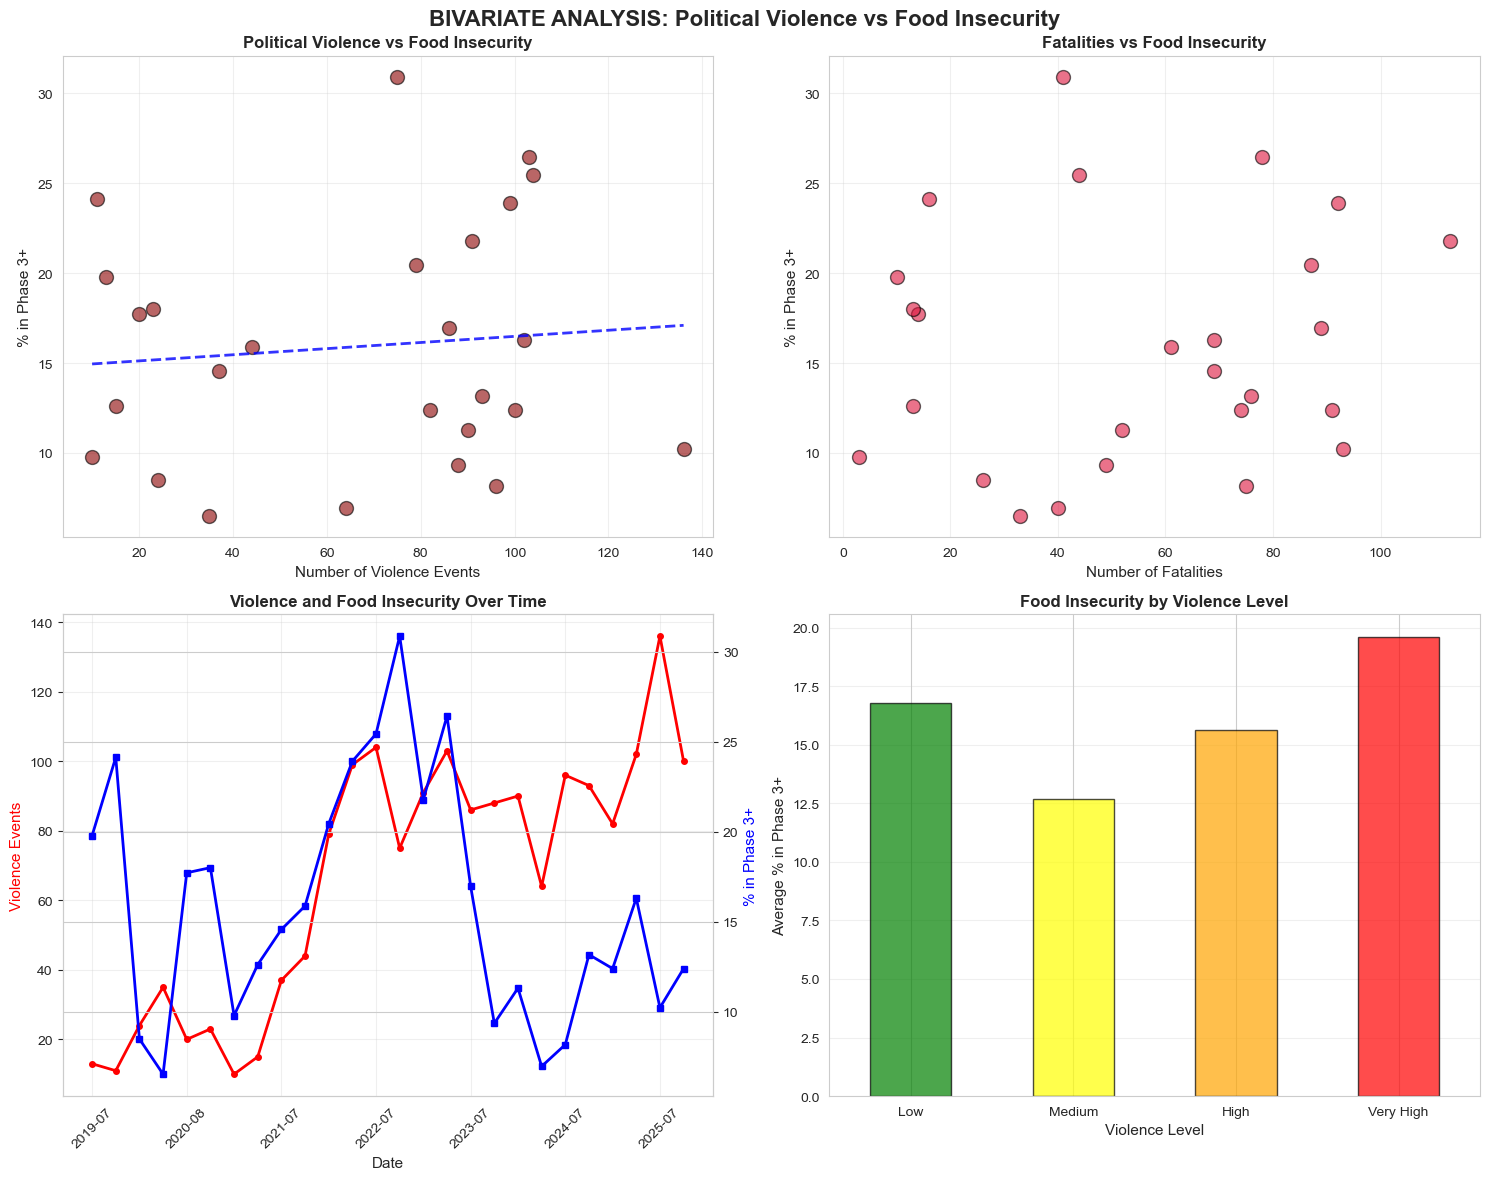

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BIVARIATE ANALYSIS: Political Violence vs Food Insecurity', fontsize=16, fontweight='bold')

# 1. Violence events vs Phase 3+
ax1 = axes[0, 0]
ax1.scatter(violence_phase3['Events'], violence_phase3['Percentage_num'] * 100,
           alpha=0.6, s=100, color='darkred', edgecolor='black')
ax1.set_xlabel('Number of Violence Events', fontsize=11)
ax1.set_ylabel('% in Phase 3+', fontsize=11)
ax1.set_title('Political Violence vs Food Insecurity', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Trend line
if len(violence_phase3) > 0:
    z = np.polyfit(violence_phase3['Events'].dropna(), 
                  violence_phase3['Percentage_num'].dropna() * 100, 1)
    p = np.poly1d(z)
    ax1.plot(violence_phase3['Events'].sort_values(), 
            p(violence_phase3['Events'].sort_values()), 
            "b--", alpha=0.8, linewidth=2)

# 2. Fatalities vs Phase 3+
ax2 = axes[0, 1]
ax2.scatter(violence_phase3['Fatalities'], violence_phase3['Percentage_num'] * 100,
           alpha=0.6, s=100, color='crimson', edgecolor='black')
ax2.set_xlabel('Number of Fatalities', fontsize=11)
ax2.set_ylabel('% in Phase 3+', fontsize=11)
ax2.set_title('Fatalities vs Food Insecurity', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# 3. Time series together
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
recent_data = violence_phase3.sort_values('year_month').tail(36)
ax3.plot(recent_data['year_month'].astype(str), recent_data['Events'],
        color='red', linewidth=2, marker='o', markersize=4, label='Violence Events')
ax3_twin.plot(recent_data['year_month'].astype(str), recent_data['Percentage_num'] * 100,
             color='blue', linewidth=2, marker='s', markersize=4, label='Phase 3+ %')
ax3.set_xlabel('Date', fontsize=11)
ax3.set_ylabel('Violence Events', fontsize=11, color='red')
ax3_twin.set_ylabel('% in Phase 3+', fontsize=11, color='blue')
ax3.set_title('Violence and Food Insecurity Over Time', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.set_xticks(ax3.get_xticks()[::4])
ax3.grid(alpha=0.3)

# 4. Phase 3+ by violence category
ax4 = axes[1, 1]
violence_phase3['Violence_Category'] = pd.cut(violence_phase3['Events'],
                                              bins=[0, 20, 50, 100, 200],
                                              labels=['Low', 'Medium', 'High', 'Very High'])
violence_cat_phase = violence_phase3.groupby('Violence_Category')['Percentage_num'].mean() * 100
violence_cat_phase.plot(kind='bar', ax=ax4, color=['green', 'yellow', 'orange', 'red'],
                       edgecolor='black', alpha=0.7)
ax4.set_xlabel('Violence Level', fontsize=11)
ax4.set_ylabel('Average % in Phase 3+', fontsize=11)
ax4.set_title('Food Insecurity by Violence Level', fontsize=12, fontweight='bold')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### 2.6.2.5 : Overall Correlation Matrix

In [76]:
# Create comprehensive correlation dataset
corr_data = pd.merge(rain_monthly_avg, phase3_monthly_avg, on='year_month', how='inner')
corr_data = pd.merge(corr_data, maize_monthly, on='year_month', how='inner')
corr_data = pd.merge(corr_data, violence_monthly[['year_month', 'Events', 'Fatalities']], 
                     on='year_month', how='inner')

# Rename for clarity
corr_data.columns = ['year_month', '3M_Rain_Quantile', '3M_Rain_Total', 'Phase3+_%', 
                     'Maize_Price', 'Violence_Events', 'Fatalities']

print("Dataset for correlation analysis:")
display(corr_data.head())

Dataset for correlation analysis:


,year_month,3M_Rain_Quantile,3M_Rain_Total,Phase3+_%,Maize_Price,Violence_Events,Fatalities
0,2020-02,221.389749,445.795298,0.084783,38.485000,24,26
1,2020-04,168.721119,475.061564,0.065217,36.105000,35,33
2,2020-08,129.518823,301.721557,0.177143,37.100000,20,14
3,2020-10,129.461343,323.946095,0.180000,28.823333,23,13
4,2021-02,100.309674,209.605333,0.097826,41.860000,10,3


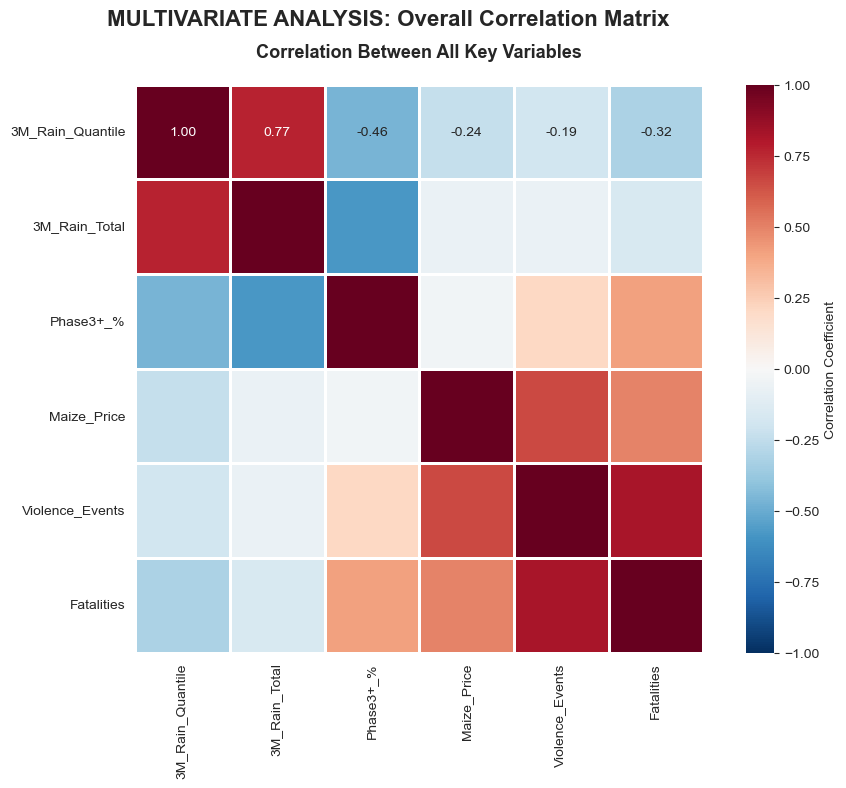

In [77]:
# Create correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.suptitle('MULTIVARIATE ANALYSIS: Overall Correlation Matrix', fontsize=16, fontweight='bold')

correlation_matrix = corr_data[['3M_Rain_Quantile', '3M_Rain_Total', 'Phase3+_%', 
                                'Maize_Price', 'Violence_Events', 'Fatalities']].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
           square=True, linewidths=1, cbar_kws={'label': 'Correlation Coefficient'},
           ax=ax, vmin=-1, vmax=1)
ax.set_title('Correlation Between All Key Variables', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

#### Food Prices Trend (Maize - a key staple)

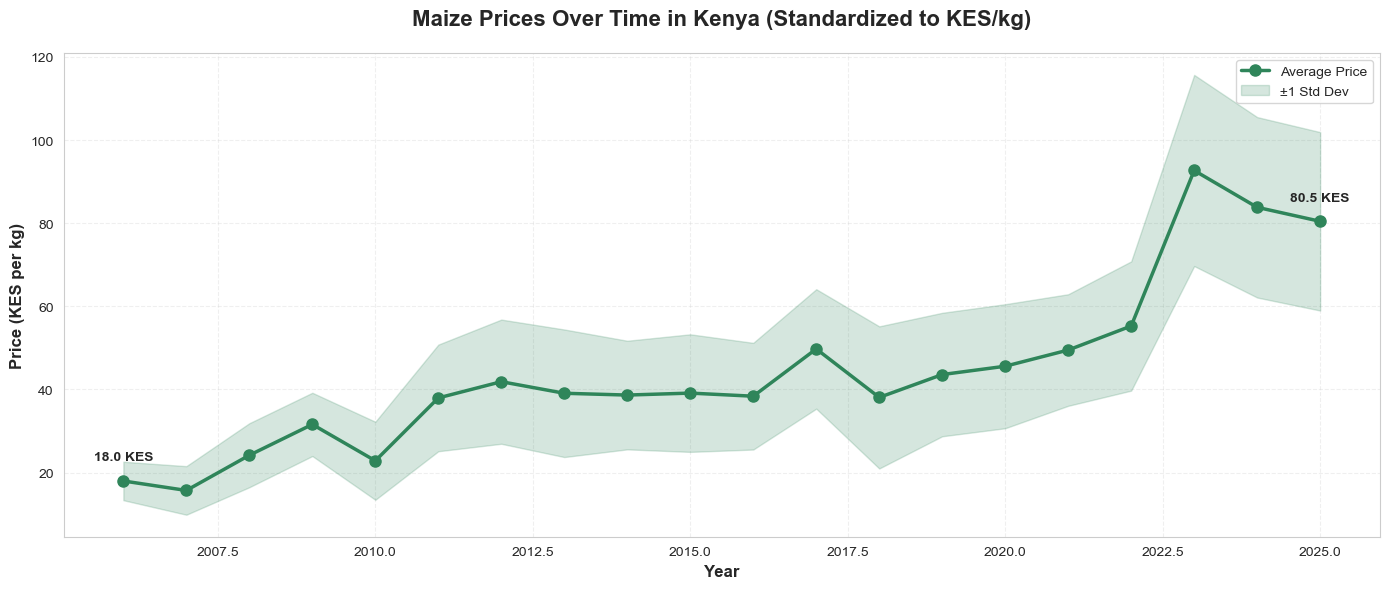


📊 MAIZE PRICE SUMMARY (KES per kg)

Overall statistics:
   Minimum:      6.00 KES/kg
   Maximum:    170.00 KES/kg
   Mean:        54.29 KES/kg
   Median:      48.33 KES/kg

📈 Trend analysis:
   2006: 17.99 KES/kg
   2025: 80.45 KES/kg
   Change:   +62.47 KES/kg (+347.3%)

📊 Data points: 3,749 records across 20 years


In [80]:
# ============================================================================
# MAIZE PRICE ANALYSIS - STANDARDIZED TO KES/KG
# ============================================================================

# Filter for maize prices
maize_prices = prices_df[prices_df['#item+name'].str.contains('Maize', case=False, na=False)].copy()

if len(maize_prices) > 0:
    # Convert date to datetime
    maize_prices['date'] = pd.to_datetime(maize_prices['#date'], errors='coerce')
    
    # Standardize to KES per KG
    def standardize_to_kg(row):
        """Convert all prices to KES per kilogram"""
        price = row['#value']
        unit = str(row['#item+unit']).lower()
        
        # Already per kg
        if 'kg' in unit and '90' not in unit:
            return price
        
        # 90 kg bag - divide by 90
        elif '90' in unit or 'bag' in unit:
            return price / 90
        
        # Unknown unit - return NaN for safety
        else:
            return np.nan
    
    maize_prices['price_per_kg'] = maize_prices.apply(standardize_to_kg, axis=1)
    
    # Remove any NaN prices
    maize_prices = maize_prices.dropna(subset=['price_per_kg'])
    
    # Group by year and get average price per kg
    maize_prices['year'] = maize_prices['date'].dt.year
    yearly_maize = maize_prices.groupby('year')['price_per_kg'].agg(['mean', 'std', 'count'])
    
    # Create visualization
    plt.figure(figsize=(14, 6))
    
    # Plot mean with shaded standard deviation
    plt.plot(
        yearly_maize.index, 
        yearly_maize['mean'], 
        marker='o', 
        linewidth=2.5, 
        color='#2F855A',
        markersize=8,
        label='Average Price'
    )
    
    # Add shaded area for standard deviation
    plt.fill_between(
        yearly_maize.index,
        yearly_maize['mean'] - yearly_maize['std'],
        yearly_maize['mean'] + yearly_maize['std'],
        alpha=0.2,
        color='#2F855A',
        label='±1 Std Dev'
    )
    
    # Labels and title
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Price (KES per kg)', fontsize=12, fontweight='bold')
    plt.title('Maize Prices Over Time in Kenya (Standardized to KES/kg)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=10)
    
    # Annotate first and last points
    first_year = yearly_maize.index[0]
    last_year = yearly_maize.index[-1]
    first_price = yearly_maize['mean'].iloc[0]
    last_price = yearly_maize['mean'].iloc[-1]
    
    plt.annotate(f'{first_price:.1f} KES', 
                xy=(first_year, first_price),
                xytext=(first_year, first_price + 5),
                fontsize=10, fontweight='bold',
                ha='center')
    
    plt.annotate(f'{last_price:.1f} KES', 
                xy=(last_year, last_price),
                xytext=(last_year, last_price + 5),
                fontsize=10, fontweight='bold',
                ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "=" * 70)
    print("📊 MAIZE PRICE SUMMARY (KES per kg)")
    print("=" * 70)
    print(f"\nOverall statistics:")
    print(f"   Minimum:  {maize_prices['price_per_kg'].min():>8.2f} KES/kg")
    print(f"   Maximum:  {maize_prices['price_per_kg'].max():>8.2f} KES/kg")
    print(f"   Mean:     {maize_prices['price_per_kg'].mean():>8.2f} KES/kg")
    print(f"   Median:   {maize_prices['price_per_kg'].median():>8.2f} KES/kg")
    
    print(f"\n📈 Trend analysis:")
    price_change = last_price - first_price
    pct_change = (price_change / first_price) * 100
    print(f"   {first_year}: {first_price:.2f} KES/kg")
    print(f"   {last_year}: {last_price:.2f} KES/kg")
    print(f"   Change:   {price_change:+.2f} KES/kg ({pct_change:+.1f}%)")
    
    print(f"\n📊 Data points: {len(maize_prices):,} records across {len(yearly_maize)} years")
    print("=" * 70)
    
else:
    print("❌ No maize price data found.")

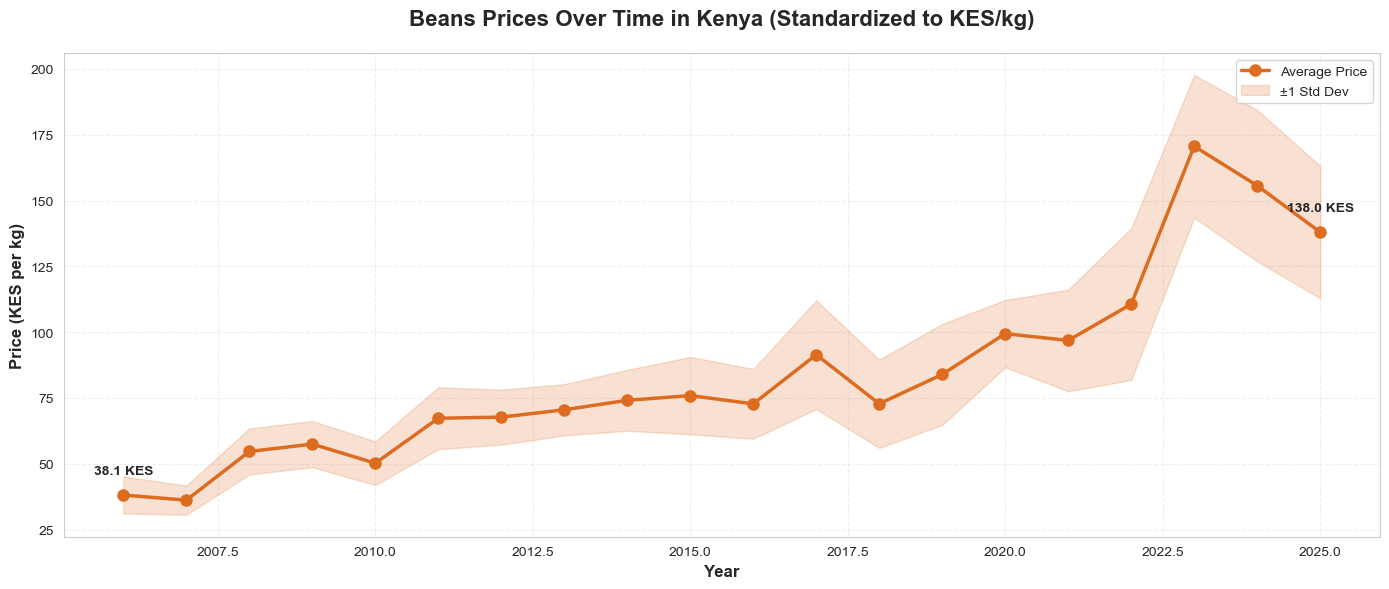


📊 BEANS PRICE SUMMARY (KES per kg)

Overall statistics:
   Minimum:     12.60 KES/kg
   Maximum:    270.00 KES/kg
   Mean:       104.75 KES/kg
   Median:      96.00 KES/kg

📈 Trend analysis:
   2006: 38.11 KES/kg
   2025: 137.99 KES/kg
   Change:   +99.88 KES/kg (+262.1%)

📊 Data points: 2,749 records across 20 years


In [81]:
# ============================================================================
# BEANS PRICE ANALYSIS - STANDARDIZED TO KES/KG
# ============================================================================

# Filter for beans prices
beans_prices = prices_df[prices_df['#item+name'].str.contains('Beans', case=False, na=False)].copy()

if len(beans_prices) > 0:
    # Convert date to datetime
    beans_prices['date'] = pd.to_datetime(beans_prices['#date'], errors='coerce')
    
    # Standardize to KES per KG
    def standardize_to_kg(row):
        """Convert all prices to KES per kilogram"""
        price = row['#value']
        unit = str(row['#item+unit']).lower()
        
        # Already per kg
        if 'kg' in unit and '90' not in unit:
            return price
        
        # 90 kg bag - divide by 90
        elif '90' in unit or 'bag' in unit:
            return price / 90
        
        # Unknown unit - return NaN for safety
        else:
            return np.nan
    
    beans_prices['price_per_kg'] = beans_prices.apply(standardize_to_kg, axis=1)
    
    # Remove any NaN prices
    beans_prices = beans_prices.dropna(subset=['price_per_kg'])
    
    # Group by year and get average price per kg
    beans_prices['year'] = beans_prices['date'].dt.year
    yearly_beans = beans_prices.groupby('year')['price_per_kg'].agg(['mean', 'std', 'count'])
    
    # Create visualization
    plt.figure(figsize=(14, 6))
    
    # Plot mean with shaded standard deviation
    plt.plot(
        yearly_beans.index, 
        yearly_beans['mean'], 
        marker='o', 
        linewidth=2.5, 
        color='#DD6B20',
        markersize=8,
        label='Average Price'
    )
    
    # Add shaded area for standard deviation
    plt.fill_between(
        yearly_beans.index,
        yearly_beans['mean'] - yearly_beans['std'],
        yearly_beans['mean'] + yearly_beans['std'],
        alpha=0.2,
        color='#DD6B20',
        label='±1 Std Dev'
    )
    
    # Labels and title
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Price (KES per kg)', fontsize=12, fontweight='bold')
    plt.title('Beans Prices Over Time in Kenya (Standardized to KES/kg)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=10)
    
    # Annotate first and last points
    first_year = yearly_beans.index[0]
    last_year = yearly_beans.index[-1]
    first_price = yearly_beans['mean'].iloc[0]
    last_price = yearly_beans['mean'].iloc[-1]
    
    plt.annotate(f'{first_price:.1f} KES', 
                xy=(first_year, first_price),
                xytext=(first_year, first_price + 8),
                fontsize=10, fontweight='bold',
                ha='center')
    
    plt.annotate(f'{last_price:.1f} KES', 
                xy=(last_year, last_price),
                xytext=(last_year, last_price + 8),
                fontsize=10, fontweight='bold',
                ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "=" * 70)
    print("📊 BEANS PRICE SUMMARY (KES per kg)")
    print("=" * 70)
    print(f"\nOverall statistics:")
    print(f"   Minimum:  {beans_prices['price_per_kg'].min():>8.2f} KES/kg")
    print(f"   Maximum:  {beans_prices['price_per_kg'].max():>8.2f} KES/kg")
    print(f"   Mean:     {beans_prices['price_per_kg'].mean():>8.2f} KES/kg")
    print(f"   Median:   {beans_prices['price_per_kg'].median():>8.2f} KES/kg")
    
    print(f"\n📈 Trend analysis:")
    price_change = last_price - first_price
    pct_change = (price_change / first_price) * 100
    print(f"   {first_year}: {first_price:.2f} KES/kg")
    print(f"   {last_year}: {last_price:.2f} KES/kg")
    print(f"   Change:   {price_change:+.2f} KES/kg ({pct_change:+.1f}%)")
    
    print(f"\n📊 Data points: {len(beans_prices):,} records across {len(yearly_beans)} years")
    print("=" * 70)
    
else:
    print("❌ No beans price data found.")

## <span style="color:#2E86C1;"><b>3. Data Cleaning<b></span>


Before we can build a prediction model, we need to **clean and prepare the data**.

### **3.1 Clean IPC Data (Food Insecurity)**

**Standardizing IPC Area Names**

we clean and standardizes the `Area` column in the IPC dataset to ensure consistent county-level analysis.

**The process:**

1. **Map informal settlements** (e.g., Kibra, Dandora) to their correct parent counties.

2. **Convert sub-counties** (e.g., Turkana North, Marsabit - Saku) into their main counties.

3. **Fix naming inconsistencies and capitalization differences** (e.g., "TANA RIVER" vs "Tana river").

4. **Create a new `County` column** with standardized names.

5. **Reduce duplicate variations** of the same county to ensure accurate aggregation and analysis.


In [86]:
print("="*80)
print("\033[1;34mISSUE 1: PROBLEMATIC AREA NAMES\033[0m")
print("-" * 70)

# Create mapping dictionary
area_to_county = {}

# 1 Map informal settlements to their correct counties
# Kisumu County
area_to_county['KONDELE'] = 'Kisumu'
area_to_county['OBUNGA'] = 'Kisumu'

# Nairobi County
nairobi_settlements = ['DANDORA', 'GITHURAI', 'KANGEMI', 'KAWANGWARE', 
                       'KAYOLE', 'KIBRA', 'MATHARE', 'MUKURU']
for settlement in nairobi_settlements:
    area_to_county[settlement] = 'Nairobi'

# Mombasa County
area_to_county['BANGLADESH'] = 'Mombasa'
area_to_county['MWEMBE TAYARI'] = 'Mombasa'

print("Informal settlements mapped:")
print(f"   • Kisumu: {['KONDELE', 'OBUNGA']}")
print(f"   • Nairobi: {nairobi_settlements}")
print(f"   • Mombasa: {['BANGLADESH', 'MWEMBE TAYARI']}")

# 2 Map sub-counties to parent counties
sub_county_mappings = {
    'Marsabit - laisamis': 'Marsabit',
    'Marsabit - moyale': 'Marsabit',
    'Marsabit - north horr': 'Marsabit',
    'Marsabit - saku': 'Marsabit',
    'Turkana central': 'Turkana',
    'Turkana east-kibish-loima': 'Turkana',
    'Turkana north': 'Turkana',
    'Turkana south': 'Turkana',
    'Turkana west': 'Turkana',
    'Elgeyo-Marakwet': 'Elgeyo Marakwet'
}
area_to_county.update(sub_county_mappings)

# 3 Standardize naming variations
area_to_county.update({
    'TANA RIVER': 'Tana River',
    'Tana river': 'Tana River',
    'Taita': 'Taita Taveta',
    'Taita taveta': 'Taita Taveta',
    'Lamu county': 'Lamu',
    'Embu (Mbeere)': 'Embu',
    'Tharaka': 'Tharaka Nithi',
    'Tharaka-nithi': 'Tharaka Nithi',
    'West pokot': 'West Pokot',
    'Homabay': 'Homa Bay'
})

print(f"\n✅ Total mappings created: {len(area_to_county)}")

# 4 Apply mapping to IPC dataframe
ipc_clean = ipc_df.copy()
ipc_clean['County'] = ipc_clean['Area'].map(area_to_county).fillna(ipc_clean['Area'])
ipc_clean['County'] = ipc_clean['County'].str.title()

print(f"\nBefore mapping: {ipc_df['Area'].nunique()} unique areas")
print(f"After mapping:  {ipc_clean['County'].nunique()} unique counties")

print("\nPreview of mapped counties:")
display(ipc_clean[['Area', 'County']].drop_duplicates().head(10))

print("\nIPC area names standardized successfully!")


ISSUE 1: PROBLEMATIC AREA NAMES
----------------------------------------------------------------------
Informal settlements mapped:
   • Kisumu: ['KONDELE', 'OBUNGA']
   • Nairobi: ['DANDORA', 'GITHURAI', 'KANGEMI', 'KAWANGWARE', 'KAYOLE', 'KIBRA', 'MATHARE', 'MUKURU']
   • Mombasa: ['BANGLADESH', 'MWEMBE TAYARI']

✅ Total mappings created: 32

Before mapping: 54 unique areas
After mapping:  31 unique counties

Preview of mapped counties:


,Area,County
0,Marsabit,Marsabit
14,Baringo,Baringo
28,Embu,Embu
42,Meru,Meru
56,Isiolo,Isiolo
70,Kilifi,Kilifi
84,Makueni,Makueni
98,Laikipia,Laikipia
112,Kwale,Kwale
126,Mandera,Mandera



IPC area names standardized successfully!


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>Standardizing names  ensure that all records are aligned at the county level, improving data accuracy for modeling and visualization.
</div>

**Standardizing Date Columns**

we convert all date-related columns into proper datetime format to ensure consistency and enable time-based analysis.

**The process:**

1. **Convert the `Date of analysis` column** (e.g., "Jul 2025") into a proper datetime format by assigning the first day of the month.

2. **Transform the `From` and `To` columns** into datetime format to represent the start and end of each IPC period.

3. **Create three new standardized date columns:**
   - `analysis_date`
   - `period_start`
   - `period_end`


In [89]:
print("="*80)
print("\033[1;34mISSUE 2: STANDARDIZING DATES\033[0m")
print("-" * 70)

# Mapping month abbreviations to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Function to parse 'Jul 2025' → datetime
def parse_analysis_date(date_str):
    """Convert 'Jul 2025' to datetime (first day of the month)"""
    parts = date_str.split()
    month_abbr = parts[0]
    year = int(parts[1])
    month = month_map[month_abbr]
    return pd.Timestamp(year=year, month=month, day=1)

# Apply parsing
ipc_clean['analysis_date'] = ipc_clean['Date of analysis'].apply(parse_analysis_date)

# Convert period start and end
ipc_clean['period_start'] = pd.to_datetime(ipc_clean['From'])
ipc_clean['period_end'] = pd.to_datetime(ipc_clean['To'])

print("\nSample date conversions:")
for i, row in ipc_clean[['Date of analysis', 'analysis_date']].head().iterrows():
    print(f"   '{row['Date of analysis']}' → {row['analysis_date'].date()}")

print(f"\nCreated 3 datetime columns: analysis_date, period_start, period_end")

# Optional preview
print("\nPreview of all date columns:")
display(ipc_clean[['Date of analysis', 'analysis_date', 'From', 'To', 'period_start', 'period_end']].head())


ISSUE 2: STANDARDIZING DATES
----------------------------------------------------------------------

Sample date conversions:
   'Jul 2025' → 2025-07-01
   'Jul 2025' → 2025-07-01
   'Jul 2025' → 2025-07-01
   'Jul 2025' → 2025-07-01
   'Jul 2025' → 2025-07-01

Created 3 datetime columns: analysis_date, period_start, period_end

Preview of all date columns:


,Date of analysis,analysis_date,From,To,period_start,period_end
0,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30
1,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30
2,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30
3,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30
4,Jul 2025,2025-07-01,2025-07-01,2025-09-30,2025-07-01,2025-09-30


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>Standardizing dates allows for accurate time-series analysis, filtering by date ranges, and proper chronological sorting for modeling and visualization.
</div>

**⚠️ Extracting Phase 3+ (Crisis and Above) Data**

Filtering the dataset to retain only IPC Phase 3+ records, which represent Crisis, Emergency, and Famine levels of food insecurity.

**The process:**

1. **Filter the dataset** to include only rows where `Phase == '3+'`.

2. **Create a new dataframe** (`ipc_phase3plus`) to preserve the original cleaned dataset.

3. **Compare total records** before and after filtering.



In [92]:
print("="*80)
print("\033[1;34mISSUE 3: EXTRACTING PHASE 3+ DATA\033[0m")
print("-" * 70)

# 1 Filter Phase 3+ rows only
ipc_phase3plus = ipc_clean[ipc_clean['Phase'] == '3+'].copy()

# 2 Print counts
print(f"Original records (all phases): {len(ipc_clean):,}")
print(f"Phase 3+ records only: {len(ipc_phase3plus):,}")

# 3 Preview sample Phase 3+ records
print("\nSample Phase 3+ records:")
display(ipc_phase3plus[['County', 'analysis_date', 'Validity period', 
                        'Phase', 'Percentage']].head(10))

print("\n Phase 3+ data extracted successfully!")


ISSUE 3: EXTRACTING PHASE 3+ DATA
----------------------------------------------------------------------
Original records (all phases): 4,522
Phase 3+ records only: 646

Sample Phase 3+ records:


,County,analysis_date,Validity period,Phase,Percentage
1,Marsabit,2025-07-01,current,3+,0.20
8,Marsabit,2025-07-01,first projection,3+,0.25
15,Baringo,2025-07-01,current,3+,0.15
22,Baringo,2025-07-01,first projection,3+,0.05
29,Embu,2025-07-01,current,3+,0.05
36,Embu,2025-07-01,first projection,3+,0.10
43,Meru,2025-07-01,current,3+,0.10
50,Meru,2025-07-01,first projection,3+,0.15
57,Isiolo,2025-07-01,current,3+,0.10
64,Isiolo,2025-07-01,first projection,3+,0.15



 Phase 3+ data extracted successfully!


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>Focusing on Phase 3+ allows the analysis to concentrate on populations experiencing acute food insecurity, which is the critical threshold for humanitarian intervention and predictive modeling.
</div>

**Selecting the Current Validity Period**

We narrow down the dataset to include only records from the current IPC validity period.

**The process:**

1. **Examine the distribution** of different validity periods (e.g., current, projected).

2. **Filter the dataset** to retain only rows where `Validity period == 'current'`.

3. **Create a new dataframe** (`ipc_current`) to preserve previous datasets.



In [95]:
print("="*80)
print("\033[1;34mISSUE 4: SELECTING VALIDITY PERIOD\033[0m")
print("-" * 70)

# 1 Show distribution of validity periods
print("Validity period distribution:")
print(ipc_phase3plus['Validity period'].value_counts())

# 2 Keep only rows where 'Validity period' is 'current'
ipc_current = ipc_phase3plus[ipc_phase3plus['Validity period'] == 'current'].copy()

# 3 Print filtered record count
print(f"\nFiltered to 'current' period only: {len(ipc_current):,} records")

# 4 Preview
print("\nSample of current Phase 3+ records:")
display(ipc_current.head(10))

print("\n Filtered IPC data to current validity period successfully!")


ISSUE 4: SELECTING VALIDITY PERIOD
----------------------------------------------------------------------
Validity period distribution:
Validity period
current             323
first projection    323
Name: count, dtype: int64

Filtered to 'current' period only: 323 records

Sample of current Phase 3+ records:


,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage,From_date,Percentage_num,County,analysis_date,period_start,period_end
1,Jul 2025,KEN,16617000,Others,Marsabit,current,2025-07-01,2025-09-30,3+,103000,0.20,2025-07-01,0.20,Marsabit,2025-07-01,2025-07-01,2025-09-30
15,Jul 2025,KEN,16617000,Others,Baringo,current,2025-07-01,2025-09-30,3+,109950,0.15,2025-07-01,0.15,Baringo,2025-07-01,2025-07-01,2025-09-30
29,Jul 2025,KEN,16617000,Others,Embu,current,2025-07-01,2025-09-30,3+,14050,0.05,2025-07-01,0.05,Embu,2025-07-01,2025-07-01,2025-09-30
43,Jul 2025,KEN,16617000,Others,Meru,current,2025-07-01,2025-09-30,3+,79500,0.10,2025-07-01,0.10,Meru,2025-07-01,2025-07-01,2025-09-30
57,Jul 2025,KEN,16617000,Others,Isiolo,current,2025-07-01,2025-09-30,3+,31600,0.10,2025-07-01,0.10,Isiolo,2025-07-01,2025-07-01,2025-09-30
71,Jul 2025,KEN,16617000,Others,Kilifi,current,2025-07-01,2025-09-30,3+,78850,0.05,2025-07-01,0.05,Kilifi,2025-07-01,2025-07-01,2025-09-30
85,Jul 2025,KEN,16617000,Others,Makueni,current,2025-07-01,2025-09-30,3+,52100,0.05,2025-07-01,0.05,Makueni,2025-07-01,2025-07-01,2025-09-30
99,Jul 2025,KEN,16617000,Others,Laikipia,current,2025-07-01,2025-09-30,3+,28050,0.05,2025-07-01,0.05,Laikipia,2025-07-01,2025-07-01,2025-09-30
113,Jul 2025,KEN,16617000,Others,Kwale,current,2025-07-01,2025-09-30,3+,94400,0.10,2025-07-01,0.10,Kwale,2025-07-01,2025-07-01,2025-09-30
127,Jul 2025,KEN,16617000,Others,Mandera,current,2025-07-01,2025-09-30,3+,287700,0.30,2025-07-01,0.30,Mandera,2025-07-01,2025-07-01,2025-09-30



 Filtered IPC data to current validity period successfully!


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note:  </strong>By focusing only on the current validity period, the analysis ensures that modeling and insights are based on the most recent and officially valid IPC conditions, avoiding projections or outdated assessments.
</div>

**Creating the Binary Target Variable**

we create a target variable for the machine learning model.

**The process:**

1. **Define a threshold** of 20% of the population in IPC Phase 3+ as the cutoff for severe food insecurity.

2. **Create a new binary column** called `food_insecure`:

   - `1` → County is classified as **food insecure** (≥ 20% in Phase 3+)  
   - `0` → County is classified as **food secure** (< 20%)

3. **Display the distribution** of the two classes to understand class balance.



In [98]:
print("="*80)
print("\033[1;34mCREATING BINARY TARGET VARIABLE\033[0m")
print("-" * 70)

# 1 Define threshold: 20% of population in Phase 3+
PHASE3_THRESHOLD = 0.20
print(f"Threshold: {PHASE3_THRESHOLD*100}% of population in Phase 3+")

# 2 Create binary target
ipc_current['food_insecure'] = (ipc_current['Percentage'] >= PHASE3_THRESHOLD).astype(int)

# 3 Show target distribution
print("\nTarget variable distribution (0=Food Secure, 1=Food Insecure):")
print(ipc_current['food_insecure'].value_counts())

# 4 Detailed breakdown
food_secure = (ipc_current['food_insecure'] == 0).sum()
food_insecure = (ipc_current['food_insecure'] == 1).sum()
print("\nBreakdown:")
print(f"   Food Secure (0):   {food_secure:,} ({food_secure/len(ipc_current)*100:.1f}%)")
print(f"   Food Insecure (1): {food_insecure:,} ({food_insecure/len(ipc_current)*100:.1f}%)")

# 5 Preview
print("\nSample with binary target:")
display(ipc_current[['County', 'analysis_date', 'Percentage', 'food_insecure']].head())

print("\n✅ Binary target variable created successfully!")


CREATING BINARY TARGET VARIABLE
----------------------------------------------------------------------
Threshold: 20.0% of population in Phase 3+

Target variable distribution (0=Food Secure, 1=Food Insecure):
food_insecure
0    223
1    100
Name: count, dtype: int64

Breakdown:
   Food Secure (0):   223 (69.0%)
   Food Insecure (1): 100 (31.0%)

Sample with binary target:


,County,analysis_date,Percentage,food_insecure
1,Marsabit,2025-07-01,0.20,1
15,Baringo,2025-07-01,0.15,0
29,Embu,2025-07-01,0.05,0
43,Meru,2025-07-01,0.10,0
57,Isiolo,2025-07-01,0.10,0



✅ Binary target variable created successfully!


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>This binary target simplifies the prediction problem into a classification task, allowing the model to learn whether a county is likely to cross the critical food insecurity threshold.
</div>

**Selecting and Finalizing Modeling Columns**

we prepare Ipc  dataset for analysis and machine learning.

**The process:**

1. **Select only the most relevant columns** needed for modeling:

   - County information  
   - Assessment and period dates  
   - Population and percentage in Phase 3+  
   - Binary target variable (`food_insecure`)

2. **Rename columns** for clarity and consistency, for example:  

   - `analysis_date` → `assessment_date`  
   - `Number` → `population_phase3plus`  



In [101]:
print("="*80)
print("\033[1;34m📋 SELECTING FINAL COLUMNS\033[0m")
print("-" * 70)

# 1 Select relevant columns
ipc_final = ipc_current[[
    'County',
    'analysis_date',
    'period_start',
    'period_end',
    'Number',
    'Percentage',
    'food_insecure'
]].copy()

# 2 Rename columns for clarity
ipc_final.rename(columns={
    'analysis_date': 'assessment_date',
    'Number': 'population_phase3plus',
    'Percentage': 'pct_phase3plus'
}, inplace=True)

# 3 Print final column names
print("Final columns:")
for i, col in enumerate(ipc_final.columns, 1):
    print(f"   {i}. {col}")

# 4 Print shape
print(f"\nFinal shape: {ipc_final.shape[0]:,} rows × {ipc_final.shape[1]} columns")

# 5 Preview
print("\nSample of final IPC dataset:")
display(ipc_final.head())

print("\n✅ IPC data ready for analysis and modeling!")




📋 SELECTING FINAL COLUMNS
----------------------------------------------------------------------
Final columns:
   1. County
   2. assessment_date
   3. period_start
   4. period_end
   5. population_phase3plus
   6. pct_phase3plus
   7. food_insecure

Final shape: 323 rows × 7 columns

Sample of final IPC dataset:


,County,assessment_date,period_start,period_end,population_phase3plus,pct_phase3plus,food_insecure
1,Marsabit,2025-07-01,2025-07-01,2025-09-30,103000,0.20,1
15,Baringo,2025-07-01,2025-07-01,2025-09-30,109950,0.15,0
29,Embu,2025-07-01,2025-07-01,2025-09-30,14050,0.05,0
43,Meru,2025-07-01,2025-07-01,2025-09-30,79500,0.10,0
57,Isiolo,2025-07-01,2025-07-01,2025-09-30,31600,0.10,0



✅ IPC data ready for analysis and modeling!


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>This step ensures the dataset is clean, focused, and ready for analysis, visualization, and predictive modeling without unnecessary or redundant columns..
</div>

**Checking and Removing Duplicate Records**

We ensure that there are no duplicate records for the same county and assessment date.

**The process:**

1. **Check for duplicate combinations** of `County` and `assessment_date`.

2. **Report the number of duplicates** found (if any).

3. **Display a sample** of duplicate records for inspection.

4. **Remove duplicates** while keeping the first valid occurrence.



In [104]:
print("="*80)
print("\033[1;34m🔍 CHECKING FOR DUPLICATES\033[0m")
print("-" * 70)

# 1 Check for duplicate county-date combinations
duplicates = ipc_final.duplicated(subset=['County', 'assessment_date'], keep=False)
num_duplicates = duplicates.sum()

# 2 Report findings
if num_duplicates > 0:
    print(f"⚠️  Found {num_duplicates} duplicate county-date combinations")
    
    print("\nSample duplicates:")
    display(ipc_final[duplicates].sort_values(['County', 'assessment_date']).head(10))
    
    # 3 Remove duplicates (keep first occurrence)
    ipc_final = ipc_final.drop_duplicates(subset=['County', 'assessment_date'], keep='first')
    print(f"\nRemoved duplicates. New shape: {ipc_final.shape}")
else:
    print("✅ No duplicates found!")

# 4 Preview final dataset
print("\nSample of deduplicated IPC dataset:")
display(ipc_final.head())

print("\n✅ Duplicate check and cleanup complete!")


🔍 CHECKING FOR DUPLICATES
----------------------------------------------------------------------
⚠️  Found 21 duplicate county-date combinations

Sample duplicates:


,County,assessment_date,period_start,period_end,population_phase3plus,pct_phase3plus,food_insecure
3753,Kisumu,2020-08-01,2020-08-01,2020-09-30,20685,0.25,1
3865,Kisumu,2020-08-01,2020-08-01,2020-09-30,27421,0.30,1
911,Marsabit,2024-07-01,2024-07-01,2024-09-30,8612,0.05,0
925,Marsabit,2024-07-01,2024-07-01,2024-09-30,22646,0.20,1
953,Marsabit,2024-07-01,2024-07-01,2024-09-30,4435,0.05,0
995,Marsabit,2024-07-01,2024-07-01,2024-09-30,35213,0.25,1
3795,Mombasa,2020-08-01,2020-08-01,2020-09-30,89879,0.55,1
3851,Mombasa,2020-08-01,2020-08-01,2020-09-30,77085,0.50,1
3711,Nairobi,2020-08-01,2020-08-01,2020-09-30,60029,0.50,1
3725,Nairobi,2020-08-01,2020-08-01,2020-09-30,215943,0.40,1



Removed duplicates. New shape: (307, 7)

Sample of deduplicated IPC dataset:


,County,assessment_date,period_start,period_end,population_phase3plus,pct_phase3plus,food_insecure
1,Marsabit,2025-07-01,2025-07-01,2025-09-30,103000,0.20,1
15,Baringo,2025-07-01,2025-07-01,2025-09-30,109950,0.15,0
29,Embu,2025-07-01,2025-07-01,2025-09-30,14050,0.05,0
43,Meru,2025-07-01,2025-07-01,2025-09-30,79500,0.10,0
57,Isiolo,2025-07-01,2025-07-01,2025-09-30,31600,0.10,0



✅ Duplicate check and cleanup complete!


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>Removing duplicates ensures that each county-date pair is represented only once, preventing data leakage, double counting, and inaccurate modeling results.
</div>

**Sorting Data by County and Assessment Date**

Organizing the dataset for easier analysis and modeling.

**The process:**

1. **Sort the dataset** first by `County` and then by `assessment_date`.

2. **Reset the index** to ensure a clean, continuous numbering of rows.



In [107]:
print("="*80)
print("\033[1;34m📅 SORTING DATA BY COUNTY AND DATE\033[0m")
print("-" * 70)

# 1 Sort dataset by County and assessment_date
ipc_final = ipc_final.sort_values(['County', 'assessment_date']).reset_index(drop=True)

# 2 Confirm sorting
print("✅ Data sorted by County and assessment_date")

# 3 Preview first few rows
print("\nSample of sorted IPC dataset:")
display(ipc_final.head())


📅 SORTING DATA BY COUNTY AND DATE
----------------------------------------------------------------------
✅ Data sorted by County and assessment_date

Sample of sorted IPC dataset:


,County,assessment_date,period_start,period_end,population_phase3plus,pct_phase3plus,food_insecure
0,Baringo,2019-07-01,2019-07-01,2019-07-31,105555,0.15,0
1,Baringo,2020-02-01,2020-02-01,2020-03-31,33339,0.05,0
2,Baringo,2020-08-01,2020-08-01,2020-09-30,33339,0.05,0
3,Baringo,2021-02-01,2021-02-01,2021-02-28,66678,0.10,0
4,Baringo,2021-07-01,2021-07-01,2021-10-31,133356,0.20,1


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong> Sorting ensures that all records for each county are in chronological order, which is important for trend analysis, time-series modeling, and clear visualizations
</div>


In [109]:
print("="*80)
print("\033[1;34m PREVIEW OF CLEANED IPC DATA\033[0m")
print("-" * 70)

# 1️⃣ Show first 15 rows of the final cleaned IPC dataset
display(ipc_final.head(15))


 PREVIEW OF CLEANED IPC DATA
----------------------------------------------------------------------


,County,assessment_date,period_start,period_end,population_phase3plus,pct_phase3plus,food_insecure
0,Baringo,2019-07-01,2019-07-01,2019-07-31,105555,0.15,0
1,Baringo,2020-02-01,2020-02-01,2020-03-31,33339,0.05,0
2,Baringo,2020-08-01,2020-08-01,2020-09-30,33339,0.05,0
3,Baringo,2021-02-01,2021-02-01,2021-02-28,66678,0.10,0
4,Baringo,2021-07-01,2021-07-01,2021-10-31,133356,0.20,1
5,Baringo,2022-02-01,2022-02-01,2022-02-28,233374,0.35,1
6,Baringo,2022-07-01,2022-07-01,2022-09-30,139670,0.40,1
7,Baringo,2023-01-01,2023-02-01,2023-02-28,220000,0.30,1
8,Baringo,2023-07-01,2023-07-01,2023-09-30,109950,0.15,0
9,Baringo,2024-02-01,2024-02-01,2024-03-31,73300,0.10,0


In [110]:
print("="*80)
print("\033[1;34m💾 SAVING CLEANED IPC DATA\033[0m")
print("-" * 70)

#  Save the cleaned IPC dataset to CSV
output_path = '../data/processed/ipc_cleaned.csv'
ipc_final.to_csv(output_path, index=False)

# Confirm save
print(f"✅ Cleaned IPC dataset saved to: {output_path}")
print(f"\n📊 Final cleaned dataset shape: {ipc_final.shape[0]:,} rows × {ipc_final.shape[1]} columns")


💾 SAVING CLEANED IPC DATA
----------------------------------------------------------------------
✅ Cleaned IPC dataset saved to: ../data/processed/ipc_cleaned.csv

📊 Final cleaned dataset shape: 307 rows × 7 columns


<div style="background-color:#E6FFFA; padding:15px; border-left:6px solid #2F855A; margin:15px 0;">
    <strong>Note: </strong> Saving the cleaned dataset allows us to reuse it for modeling, visualization, or reporting without repeating the preprocessing steps.
</div>

#### **3.2: Rainfall Data**

In [113]:
print(f"Original Shape: {rainfall_df.shape[0]:,} rows × {rainfall_df.shape[1]} columns")

Original Shape: 131,544 rows × 16 columns


In [114]:
# Convert date to datetime
rainfall_df['date'] = pd.to_datetime(rainfall_df['date'])

**Filter to Relevant Time Period (2019–2025)**

To ensure that the rainfall dataset aligns with the IPC analysis period.

**The process:**

1. Target period: January 1, 2019 → December 31, 2025.  
2. Filters the `rainfall_df` dataset to include only dates within this range.  
3. Reports:
   - Original and filtered date ranges  
   - Number of records before and after filtering  
   - Percentage reduction in data


In [116]:
print("\n FILTERING TO IPC TIME PERIOD (2019-2025)")
print("-" * 70)

# Define time period
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2025-12-31')

print(f"Original date range: {rainfall_df['date'].min().date()} to {rainfall_df['date'].max().date()}")

# Filter to relevant period
rainfall_filtered = rainfall_df[
    (rainfall_df['date'] >= start_date) & 
    (rainfall_df['date'] <= end_date)
].copy()

print(f"Filtered date range: {rainfall_filtered['date'].min().date()} to {rainfall_filtered['date'].max().date()}")
print(f"Before filtering: {len(rainfall_df):,} records")
print(f"After filtering:  {len(rainfall_filtered):,} records")
print(f"Reduction: {(1 - len(rainfall_filtered)/len(rainfall_df))*100:.1f}%")


 FILTERING TO IPC TIME PERIOD (2019-2025)
----------------------------------------------------------------------
Original date range: 1981-01-01 to 2026-02-01
Filtered date range: 2019-01-01 to 2025-12-21
Before filtering: 131,544 records
After filtering:  20,412 records
Reduction: 84.5%


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>Filtering ensures that the rainfall data matches the timeframe of IPC assessments, avoiding irrelevant historical or future data in the analysis..
</div>

**Selecting Administrative Level**

We choose the appropriate geographic granularity for analysis.

**The process:**

1. Examines the distribution of administrative levels (`adm_level`) in the rainfall dataset.  
2. Selects **Level 2 (sub-county)** data for finer geographic detail, instead of broader regions (Level 1).  
3. Reports:
   - Number of records retained  
   - Number of unique sub-county codes (`PCODE`)


In [119]:
print("SELECTING ADMINISTRATIVE LEVEL")
print("-" * 70)

print("Administrative level distribution:")
print(rainfall_filtered['adm_level'].value_counts())

# Keep only Level 2 (sub-county level)
rainfall_level2 = rainfall_filtered[rainfall_filtered['adm_level'] == 2].copy()

print(f"\nSelected Level 2 (sub-county) data")
print(f"Records: {len(rainfall_level2):,}")
print(f"Unique PCODEs: {rainfall_level2['PCODE'].nunique()}")

SELECTING ADMINISTRATIVE LEVEL
----------------------------------------------------------------------
Administrative level distribution:
adm_level
2    18396
1     2016
Name: count, dtype: int64

Selected Level 2 (sub-county) data
Records: 18,396
Unique PCODEs: 73


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note:</strong>Using Level 2 ensures that rainfall data aligns more precisely with county/sub-county IPC data, improving spatial accuracy for modeling and analysis.
</div>

**Mapping PCODEs to Counties**

We convert PCODEs (alphanumeric location codes) into human-readable county names for easier analysis.

**The process:**

1. Uses [Kenya’s official PCODE-to-county](https://www.devolution.go.ke/county-information) mapping (e.g., KE001 → Mombasa).  
2. Defines a function to extract the first 5 characters of the PCODE and map it to the corresponding county.  
3. Applies the function to create a new **County** column in the rainfall dataset.  
4. Reports:
   - Number of unique PCODEs mapped  
   - Number of unique counties  
   - Any unmapped PCODEs (if present)  
   - Lists all counties included in the final dataset


In [122]:

print("MAPPING PCODES TO COUNTIES")
print("-" * 70)

# Create PCODE to County mapping
# This mapping is based on Kenya's official county codes
pcode_to_county = {
    # Format: 'PCODEPREFIX': 'County Name'
    'KE001': 'Mombasa',
    'KE002': 'Kwale',
    'KE003': 'Kilifi',
    'KE004': 'Tana River',
    'KE005': 'Lamu',
    'KE006': 'Taita Taveta',
    'KE007': 'Garissa',
    'KE008': 'Wajir',
    'KE009': 'Mandera',
    'KE010': 'Marsabit',
    'KE011': 'Isiolo',
    'KE012': 'Meru',
    'KE013': 'Tharaka Nithi',
    'KE014': 'Embu',
    'KE015': 'Kitui',
    'KE016': 'Machakos',
    'KE017': 'Makueni',
    'KE018': 'Nyandarua',
    'KE019': 'Nyeri',
    'KE020': 'Kirinyaga',
    'KE021': 'Murang\'a',
    'KE022': 'Kiambu',
    'KE023': 'Turkana',
    'KE024': 'West Pokot',
    'KE025': 'Samburu',
    'KE026': 'Trans Nzoia',
    'KE027': 'Uasin Gishu',
    'KE028': 'Elgeyo Marakwet',
    'KE029': 'Nandi',
    'KE030': 'Baringo',
    'KE031': 'Laikipia',
    'KE032': 'Nakuru',
    'KE033': 'Narok',
    'KE034': 'Kajiado',
    'KE035': 'Kericho',
    'KE036': 'Bomet',
    'KE037': 'Kakamega',
    'KE038': 'Vihiga',
    'KE039': 'Bungoma',
    'KE040': 'Busia',
    'KE041': 'Siaya',
    'KE042': 'Kisumu',
    'KE043': 'Homa Bay',
    'KE044': 'Migori',
    'KE045': 'Kisii',
    'KE046': 'Nyamira',
    'KE047': 'Nairobi'
}

# Function to map PCODE to county
def map_pcode_to_county(pcode):
    """Extract county from PCODE"""
    # Extract first 5 characters (e.g., 'KE001' from 'KE001003')
    prefix = pcode[:5]
    return pcode_to_county.get(prefix, 'Unknown')

# Apply mapping
rainfall_level2['County'] = rainfall_level2['PCODE'].apply(map_pcode_to_county)

print(f"Mapped {rainfall_level2['PCODE'].nunique()} PCODEs to counties")
print(f"Unique counties: {rainfall_level2['County'].nunique()}")

# Check for unmapped PCODEs
unknown_count = (rainfall_level2['County'] == 'Unknown').sum()
if unknown_count > 0:
    print(f"\n⚠️  Warning: {unknown_count} records with unmapped PCODEs")
    print("Unmapped PCODEs:")
    print(rainfall_level2[rainfall_level2['County'] == 'Unknown']['PCODE'].unique())
else:
    print("\n✅ All PCODEs successfully mapped!")

print(f"\nCounties in rainfall data:")
print(sorted(rainfall_level2['County'].unique()))


MAPPING PCODES TO COUNTIES
----------------------------------------------------------------------
Mapped 73 PCODEs to counties
Unique counties: 47

✅ All PCODEs successfully mapped!

Counties in rainfall data:
['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'a", 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka Nithi', 'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot']


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>Mapping PCODEs ensures that rainfall data aligns spatially with IPC county-level data, enabling accurate merging and analysis.
</div>

**Aggregate Rainfall from Dekadal to Monthly**

Convert the rainfall dataset from dekadal (~10-day) intervals to monthly totals, matching the frequency of IPC data.

**The process:**

1. Creates a `year_month` column to group data by month for each county.  

2. Aggregates dekadal records to the monthly level:
   - `rfh` → total rainfall (sum of dekads)  
   - `rfh_avg` → average rainfall metric  
   - `r1h`, `r1h_avg`, `r3h`, `r3h_avg` → last available values for cumulative rainfall  
   - `PCODE` → keeps the first code for reference  

3. Converts the `year_month` period back to a standard timestamp.

4. Reports:
   - Number of monthly records  
   - Number of counties  
   - Date range of the aggregated dataset


In [125]:
print("AGGREGATING FROM DEKADAL TO MONTHLY")
print("-" * 70)

# Add year-month column for grouping
rainfall_level2['year_month'] = rainfall_level2['date'].dt.to_period('M')

print(f"Before aggregation: {len(rainfall_level2):,} dekadal records")

# Aggregate to monthly level
# For each county-month, we'll calculate:
# - Total rainfall (sum of dekads)
# - Average rainfall metrics
monthly_rainfall = rainfall_level2.groupby(['County', 'year_month']).agg({
    'rfh': 'sum',              # Sum of dekadal rainfall = monthly total
    'rfh_avg': 'mean',         # Average of long-term averages
    'r1h': 'last',             # Last available 1-month cumulative
    'r1h_avg': 'last',         # Last available 1-month average
    'r3h': 'last',             # Last available 3-month cumulative (most important!)
    'r3h_avg': 'last',         # Last available 3-month average
    'PCODE': 'first'           # Keep PCODE for reference
}).reset_index()

# Convert period back to timestamp
monthly_rainfall['date'] = monthly_rainfall['year_month'].dt.to_timestamp()
monthly_rainfall = monthly_rainfall.drop('year_month', axis=1)

print(f"After aggregation:  {len(monthly_rainfall):,} monthly records")
print(f"Counties: {monthly_rainfall['County'].nunique()}")
print(f"Date range: {monthly_rainfall['date'].min().date()} to {monthly_rainfall['date'].max().date()}")


AGGREGATING FROM DEKADAL TO MONTHLY
----------------------------------------------------------------------
Before aggregation: 18,396 dekadal records
After aggregation:  3,948 monthly records
Counties: 47
Date range: 2019-01-01 to 2025-12-01


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>Monthly aggregation ensures the rainfall data aligns temporally with IPC assessments, which are reported monthly, enabling accurate merging and analysis.
</div>

**Handling Missing Values**

We ensure that the rainfall dataset has no missing or infinite values, which could disrupt analysis or modeling.

**The process:**

1. **Check for missing values** in all columns and report counts and percentages.

2. **Handle missing data:**
   - For 3-month rolling metrics (`r3h`, `r3h_avg`): use forward fill within each county to fill small gaps.
   - For rainfall anomaly (`rainfall_anomaly_pct`): replace infinite values with `0`.

3. **Drop any remaining missing rows**, if necessary, after applying filling strategies.



In [131]:
print("HANDLING MISSING VALUES")
print("-" * 70)

# Check missing values
missing = monthly_rainfall_clean.isnull().sum()
missing_report = missing[missing > 0]

if len(missing_report) > 0:
    print("Missing values found:")
    for col in missing_report.index:
        count = missing_report[col]
        pct = (count / len(monthly_rainfall_clean)) * 100
        print(f"   • {col:30s}: {count:5d} ({pct:5.2f}%)")
    
    # Handle missing values
    # For rainfall metrics, missing usually means insufficient data for rolling averages
    # We'll fill with 0 or forward fill for small gaps
    
    print("\nHandling strategy:")
    print("   • r3h, r3h_avg: Forward fill (small gaps in early months)")
    print("   • rainfall_anomaly_pct: Fill inf values with 0")
    
    # Forward fill for 3-month metrics (fills small gaps)
    monthly_rainfall_clean['r3h'] = monthly_rainfall_clean.groupby('County')['r3h'].fillna(method='ffill')
    monthly_rainfall_clean['r3h_avg'] = monthly_rainfall_clean.groupby('County')['r3h_avg'].fillna(method='ffill')
    
    # Replace infinite values in anomaly calculation
    monthly_rainfall_clean['rainfall_anomaly_pct'] = monthly_rainfall_clean['rainfall_anomaly_pct'].replace([np.inf, -np.inf], 0)
    
    # Final check
    remaining_missing = monthly_rainfall_clean.isnull().sum().sum()
    print(f"\nRemaining missing values: {remaining_missing}")
    
    if remaining_missing > 0:
        # Drop rows with remaining missing values
        before_drop = len(monthly_rainfall_clean)
        monthly_rainfall_clean = monthly_rainfall_clean.dropna()
        after_drop = len(monthly_rainfall_clean)
        print(f"Dropped {before_drop - after_drop} rows with missing values")
else:
    print("✅ No missing values!")


HANDLING MISSING VALUES
----------------------------------------------------------------------
✅ No missing values!


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>This ensures a complete, clean dataset without gaps, which is critical for accurate predictive modeling of food insecurity.
</div>

**Selecting Final Rainfall Columns**

Preparinung the rainfall dataset for modeling by keeping only the most relevant features.

**The process:**

1. **Select key columns** for predictive analysis:

   - Monthly rainfall totals and averages  
     - `monthly_rainfall_mm`  
     - `monthly_avg_mm`  

   - 3-month cumulative rainfall  
     - `rainfall_3month_mm`  
     - `rainfall_3month_avg_mm`  

   - Rainfall anomaly and drought indicators  
     - `rainfall_anomaly_pct`  
     - `is_drought`  

   - Temporal features  
     - `month`  
     - `in_long_rains`  
     - `in_short_rains`  

   - Location and time identifiers  
     - `County`  
     - `date`  

2. **Rename columns** for clarity and consistency where necessary.



In [134]:
print("\n📋 SELECTING FINAL COLUMNS")
print("-" * 70)

# Select relevant columns for modeling
rainfall_final = monthly_rainfall_clean[[
    'County',
    'date',
    'rfh',                      # Monthly total rainfall
    'rfh_avg',                  # Historical average
    'r3h',                      # 3-month cumulative (key feature!)
    'r3h_avg',                  # 3-month average
    'rainfall_anomaly_pct',     # Anomaly
    'is_drought',               # Drought flag
    'month',                    # Calendar month
    'in_long_rains',            # Season indicator
    'in_short_rains'            # Season indicator
]].copy()

# Rename for clarity
rainfall_final.rename(columns={
    'rfh': 'monthly_rainfall_mm',
    'rfh_avg': 'monthly_avg_mm',
    'r3h': 'rainfall_3month_mm',
    'r3h_avg': 'rainfall_3month_avg_mm'
}, inplace=True)

print("Final columns:")
for i, col in enumerate(rainfall_final.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\nFinal shape: {rainfall_final.shape[0]:,} rows × {rainfall_final.shape[1]} columns")


📋 SELECTING FINAL COLUMNS
----------------------------------------------------------------------
Final columns:
    1. County
    2. date
    3. monthly_rainfall_mm
    4. monthly_avg_mm
    5. rainfall_3month_mm
    6. rainfall_3month_avg_mm
    7. rainfall_anomaly_pct
    8. is_drought
    9. month
   10. in_long_rains
   11. in_short_rains

Final shape: 3,948 rows × 11 columns


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note: </strong>This creates a clean, ready-to-use rainfall dataset aligned with IPC data for modeling food insecurity.
</div>

**Sorting Rainfall Data by County and Date**

1. **Sort the dataset** first by `County` and then by `date`.

2. **Reset the index** to ensure a clean, continuous numbering of rows.



In [137]:
# Sort by county and date
rainfall_final = rainfall_final.sort_values(['County', 'date']).reset_index(drop=True)

print("\n✅ Data sorted by County and Date")



✅ Data sorted by County and Date


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note:</strong>Sorting ensures that temporal analyses, feature engineering, and county-level merges are accurate and consistent.
</div>

In [139]:
# ### Preview Cleaned Data

print("\n🔍 PREVIEW OF CLEANED RAINFALL DATA")
print("-" * 70)
display(rainfall_final.head(15).to_string())



🔍 PREVIEW OF CLEANED RAINFALL DATA
----------------------------------------------------------------------


'     County       date  monthly_rainfall_mm  monthly_avg_mm  rainfall_3month_mm  rainfall_3month_avg_mm  rainfall_anomaly_pct  is_drought  month  in_long_rains  in_short_rains\n0   Baringo 2019-01-01            31.841866        9.958047          134.328930               188.71886                219.76           0      1              0               0\n1   Baringo 2019-02-01            19.672871       10.040006          104.776320               124.95044                 95.94           0      2              0               0\n2   Baringo 2019-03-01            71.368947       26.219569           56.723682               152.41579                172.20           0      3              1               0\n3   Baringo 2019-04-01           194.229668       44.859134          151.184200               273.55966                332.98           0      4              1               0\n4   Baringo 2019-05-01           161.884926       44.135757          249.552630               385.60483           

🔎 **Checking Alignment Between Rainfall and IPC Data**

This step verifies that the rainfall dataset matches the counties present in the IPC dataset, ensuring proper merging.

**The process:**

1. **Load the cleaned IPC dataset** and extract the list of unique counties.

2. **Compare counties** in the IPC and rainfall datasets:
   - Count total counties in each dataset.  
   - Identify counties present in both datasets (overlap).  

3. **List counties only in IPC** (no rainfall data) — highlights potential data gaps.

4. **List counties only in rainfall** (not in IPC) — usually acceptable but should be noted.


In [141]:
print("\n🔗 CHECKING ALIGNMENT WITH IPC DATA")
print("-" * 70)

# Load cleaned IPC data to compare
ipc_clean = pd.read_pickle('../data/processed/pickle/ipc_cleaned.pkl')


ipc_counties = set(ipc_clean['County'].unique())
rainfall_counties = set(rainfall_final['County'].unique())

print(f"Counties in IPC data: {len(ipc_counties)}")
print(f"Counties in Rainfall data: {len(rainfall_counties)}")

# Find overlap
overlap = ipc_counties.intersection(rainfall_counties)
print(f"\n✅ Counties in BOTH datasets: {len(overlap)}")
print(f"   {sorted(overlap)}")

# Counties only in IPC
only_ipc = ipc_counties - rainfall_counties
if only_ipc:
    print(f"\n⚠️  Counties ONLY in IPC (no rainfall data): {len(only_ipc)}")
    print(f"   {sorted(only_ipc)}")

# Counties only in Rainfall
only_rainfall = rainfall_counties - ipc_counties
if only_rainfall:
    print(f"\n📌 Counties ONLY in Rainfall (not in IPC): {len(only_rainfall)}")
    print(f"   Total: {len(only_rainfall)} counties")
    print(f"   (This is OK - IPC only assesses high-risk counties)")


🔗 CHECKING ALIGNMENT WITH IPC DATA
----------------------------------------------------------------------
Counties in IPC data: 31
Counties in Rainfall data: 47

✅ Counties in BOTH datasets: 31
   ['Baringo', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kiambu', 'Kilifi', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', 'Nairobi', 'Narok', 'Nyeri', 'Samburu', 'Taita Taveta', 'Tana River', 'Tharaka Nithi', 'Turkana', 'Wajir', 'West Pokot']

📌 Counties ONLY in Rainfall (not in IPC): 16
   Total: 16 counties
   (This is OK - IPC only assesses high-risk counties)


<div style="border-left: 4px solid #2F855A; padding: 10px; background-color:#F0FFF4;">
<strong>Note:</strong>This alignment check ensures that subsequent merging and modeling will use consistent county-level data, avoiding missing values or mismatches between IPC outcomes and rainfall predictors.
</div>

In [143]:
print("\n💾 SAVING CLEANED RAINFALL DATA")
print("-" * 70)

# Save to CSV
rainfall_final.to_csv('../data/processed/rainfall_cleaned.csv', index=False)
print("✅ Saved to: ../data/processed/rainfall_cleaned.csv")
print(f"\nFinal cleaned dataset: {rainfall_final.shape[0]:,} rows × {rainfall_final.shape[1]} columns")


💾 SAVING CLEANED RAINFALL DATA
----------------------------------------------------------------------
✅ Saved to: ../data/processed/rainfall_cleaned.csv

Final cleaned dataset: 3,948 rows × 11 columns


In [144]:
print("\n📂 Loading CSV file...")
prices_df = pd.read_csv('../data/raw/wfp_food_prices_ken.csv', skiprows=[1])


📂 Loading CSV file...


In [145]:
print("=" * 70)
print("FOOD PRICES DATA CLEANING")
print("=" * 70)
print(f"\n📊 Original Shape: {prices_df.shape[0]:,} rows × {prices_df.shape[1]} columns")

FOOD PRICES DATA CLEANING

📊 Original Shape: 17,364 rows × 16 columns


In [146]:
# Rename columns to simpler names
prices_df.columns = ['date', 'admin1', 'admin2', 'market', 'market_id', 'latitude', 'longitude',
                     'category', 'commodity', 'commodity_id', 'unit', 'priceflag', 'pricetype',
                     'currency', 'price', 'usdprice']

In [147]:
# Convert date to datetime
prices_df['date'] = pd.to_datetime(prices_df['date'])

print("\n📅 Temporal Coverage:")
print("-" * 70)
print(f"Start date: {prices_df['date'].min().date()}")
print(f"End date:   {prices_df['date'].max().date()}")
print(f"Time span:  {(prices_df['date'].max() - prices_df['date'].min()).days / 365:.1f} years")


📅 Temporal Coverage:
----------------------------------------------------------------------
Start date: 2006-01-15
End date:   2025-11-15
Time span:  19.8 years


In [148]:
print("\n🔍 First 10 Rows:")
print("-" * 70)
print(prices_df.head(10)[['date', 'admin1', 'market', 'commodity', 'price', 'pricetype', 'unit']].to_string())



🔍 First 10 Rows:
----------------------------------------------------------------------
        date   admin1   market                commodity    price  pricetype    unit
0 2006-01-15    Coast  Mombasa                    Maize    16.13  Wholesale      KG
1 2006-01-15    Coast  Mombasa            Maize (white)  1480.00  Wholesale   90 KG
2 2006-01-15    Coast  Mombasa                    Beans    33.63  Wholesale      KG
3 2006-01-15  Eastern    Kitui            Maize (white)    17.00     Retail      KG
4 2006-01-15  Eastern    Kitui                  Sorghum  1800.00  Wholesale   90 KG
5 2006-01-15  Nairobi  Nairobi                    Maize    15.48  Wholesale      KG
6 2006-01-15  Nairobi  Nairobi            Maize (white)  1399.00  Wholesale   90 KG
7 2006-01-15  Nairobi  Nairobi         Potatoes (Irish)   664.43  Wholesale   50 KG
8 2006-01-15  Nairobi  Nairobi                  Sorghum  1960.00  Wholesale   90 KG
9 2006-01-15  Nairobi  Nairobi  Milk (cow, pasteurized)    22.00     Re

In [149]:
print("\n📅 ISSUE 1: FILTERING TO IPC TIME PERIOD (2019-2025)")
print("-" * 70)

# Define time period
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2025-12-31')

print(f"Original date range: {prices_df['date'].min().date()} to {prices_df['date'].max().date()}")

# Filter to relevant period
prices_filtered = prices_df[
    (prices_df['date'] >= start_date) & 
    (prices_df['date'] <= end_date)
].copy()

print(f"Filtered date range: {prices_filtered['date'].min().date()} to {prices_filtered['date'].max().date()}")
print(f"Before filtering: {len(prices_df):,} records")
print(f"After filtering:  {len(prices_filtered):,} records")
print(f"Kept: {(len(prices_filtered)/len(prices_df))*100:.1f}% of data")


📅 ISSUE 1: FILTERING TO IPC TIME PERIOD (2019-2025)
----------------------------------------------------------------------
Original date range: 2006-01-15 to 2025-11-15
Filtered date range: 2019-01-15 to 2025-11-15
Before filtering: 17,364 records
After filtering:  13,376 records
Kept: 77.0% of data


In [150]:
# ### Issue 2: Focus on Retail Prices

# %%
print("\n💰 ISSUE 2: SELECTING RETAIL PRICES")
print("-" * 70)

print("Price type distribution:")
print(prices_filtered['pricetype'].value_counts())

# Keep only retail prices (what consumers pay)
prices_retail = prices_filtered[prices_filtered['pricetype'] == 'Retail'].copy()

print(f"\nKept Retail prices only: {len(prices_retail):,} records")
print(f"Focus: Household food affordability")


💰 ISSUE 2: SELECTING RETAIL PRICES
----------------------------------------------------------------------
Price type distribution:
pricetype
Retail       9895
Wholesale    3481
Name: count, dtype: int64

Kept Retail prices only: 9,895 records
Focus: Household food affordability


In [151]:
print("\n🌾 ISSUE 3: SELECTING KEY STAPLE FOODS")
print("-" * 70)
print("Top commodities in retail data:")
print(prices_retail['commodity'].value_counts().head(10))

# Focus on Maize and Beans (primary staples)
# Include variations: Maize, Maize (white), Beans, Beans (dry)
maize_keywords = ['Maize', 'maize']
beans_keywords = ['Beans', 'beans']

prices_staples = prices_retail[
    prices_retail['commodity'].str.contains('|'.join(maize_keywords), na=False) |
    prices_retail['commodity'].str.contains('|'.join(beans_keywords), na=False)
].copy()

print(f"\nFiltered to Maize and Beans: {len(prices_staples):,} records")
print("\nCommodities kept:")
print(prices_staples['commodity'].value_counts())


🌾 ISSUE 3: SELECTING KEY STAPLE FOODS
----------------------------------------------------------------------
Top commodities in retail data:
commodity
Salt                          808
Wheat flour                   808
Sugar                         787
Beans                         519
Beans (dry)                   458
Maize flour                   438
Oil (vegetable, fortified)    436
Oil (vegetable)               436
Rice                          431
Rice (aromatic)               416
Name: count, dtype: int64

Filtered to Maize and Beans: 2,601 records

Commodities kept:
commodity
Beans                  519
Beans (dry)            458
Maize flour            438
Maize flour (white)    412
Maize                  354
Maize (white, dry)     287
Maize (white)          133
Name: count, dtype: int64


In [152]:
# ### Issue 4: Standardize Units to Price per KG

# %%
print("\n⚖️  ISSUE 4: STANDARDIZING UNITS TO PRICE PER KG")
print("-" * 70)

print("Current units:")
print(prices_staples['unit'].value_counts())

# Create a function to convert all prices to KES per KG
def standardize_to_per_kg(row):
    """Convert price to KES per KG"""
    price = row['price']
    unit = row['unit']
    
    if pd.isna(unit) or pd.isna(price):
        return np.nan
    
    # Already per KG
    if unit == 'KG':
        return price
    
    # Convert from bags to per KG
    elif unit == '90 KG':
        return price / 90
    elif unit == '50 KG':
        return price / 50
    elif unit == '64 KG':
        return price / 64
    elif unit == '13 KG':
        return price / 13
    elif unit == '126 KG':
        return price / 126
    elif unit == '200 G':
        return price / 0.2
    
    # For other units, return NaN (we'll drop these)
    else:
        return np.nan

prices_staples['price_per_kg'] = prices_staples.apply(standardize_to_per_kg, axis=1)


⚖️  ISSUE 4: STANDARDIZING UNITS TO PRICE PER KG
----------------------------------------------------------------------
Current units:
unit
KG    2601
Name: count, dtype: int64


In [153]:
# Remove rows where conversion failed
prices_clean = prices_staples[prices_staples['price_per_kg'].notna()].copy()

print(f"\nStandardized prices to KES per KG")
print(f"Records with valid conversions: {len(prices_clean):,}")
print(f"Dropped {len(prices_staples) - len(prices_clean):,} records with unconvertible units")

print("\nPrice per KG statistics:")
print(prices_clean.groupby('commodity')['price_per_kg'].describe()[['count', 'mean', 'min', 'max']])


Standardized prices to KES per KG
Records with valid conversions: 2,601
Dropped 0 records with unconvertible units

Price per KG statistics:
                     count        mean   min     max
commodity                                           
Beans                519.0  159.644509  91.0  270.00
Beans (dry)          458.0  129.797162  70.0  210.57
Maize                354.0   58.271610  30.0  120.00
Maize (white)        133.0   54.042857  27.0   85.00
Maize (white, dry)   287.0   84.569686  33.0  152.00
Maize flour          438.0   80.584543  50.0  150.47
Maize flour (white)  412.0   96.061481  46.0  170.00


In [154]:
print("\n🌽 ISSUE 5: CATEGORIZING COMMODITIES")
print("-" * 70)
# Simplify commodity names to Maize or Beans
def categorize_commodity(commodity_name):
    """Categorize into Maize or Beans"""
    if 'Maize' in commodity_name or 'maize' in commodity_name:
        return 'Maize'
    elif 'Beans' in commodity_name or 'beans' in commodity_name:
        return 'Beans'
    else:
        return 'Other'

prices_clean['commodity_category'] = prices_clean['commodity'].apply(categorize_commodity)
print("Commodity categories:")
print(prices_clean['commodity_category'].value_counts())
print("\nAverage price per commodity:")
print(prices_clean.groupby('commodity_category')['price_per_kg'].mean().round(2))


🌽 ISSUE 5: CATEGORIZING COMMODITIES
----------------------------------------------------------------------
Commodity categories:
commodity_category
Maize    1624
Beans     977
Name: count, dtype: int64

Average price per commodity:
commodity_category
Beans    145.65
Maize     78.18
Name: price_per_kg, dtype: float64


In [155]:
# %% [markdown]
# ### Issue 6: Aggregate to Monthly Regional Averages

# %%
print("\n📊 ISSUE 6: AGGREGATING TO MONTHLY REGIONAL AVERAGES")
print("-" * 70)

# Add year-month column
prices_clean['year_month'] = prices_clean['date'].dt.to_period('M')

print(f"Regions in data: {prices_clean['admin1'].unique()}")

# Aggregate: Average price per region per month per commodity
monthly_prices = prices_clean.groupby(
    ['admin1', 'year_month', 'commodity_category']
).agg({
    'price_per_kg': 'mean',
    'market': 'count'  # Number of market observations
}).reset_index()

monthly_prices.rename(columns={'market': 'num_markets'}, inplace=True)

# Convert period back to timestamp
monthly_prices['date'] = monthly_prices['year_month'].dt.to_timestamp()
monthly_prices = monthly_prices.drop('year_month', axis=1)

print(f"\nBefore aggregation: {len(prices_clean):,} price observations")
print(f"After aggregation:  {len(monthly_prices):,} region-month-commodity records")

print("\nSample aggregated data:")
print(monthly_prices.head(10))


📊 ISSUE 6: AGGREGATING TO MONTHLY REGIONAL AVERAGES
----------------------------------------------------------------------
Regions in data: [nan 'Coast' 'North Eastern' 'Rift Valley' 'Eastern' 'Nairobi']

Before aggregation: 2,601 price observations
After aggregation:  406 region-month-commodity records

Sample aggregated data:
  admin1 commodity_category  price_per_kg  num_markets       date
0  Coast              Beans          76.0            1 2019-01-01
1  Coast              Maize          41.1            1 2019-01-01
2  Coast              Beans          74.5            1 2019-02-01
3  Coast              Maize          41.1            1 2019-02-01
4  Coast              Beans          76.0            1 2019-03-01
5  Coast              Beans          85.2            1 2019-04-01
6  Coast              Maize          45.1            1 2019-04-01
7  Coast              Maize          49.1            1 2019-05-01
8  Coast              Beans         103.8            1 2019-06-01
9  Coast 

In [156]:
print("\n🔄 ISSUE 7: PIVOTING TO WIDE FORMAT")
print("-" * 70)
# Pivot so we have separate columns for Maize and Beans prices
prices_wide = monthly_prices.pivot_table(
    index=['admin1', 'date'],
    columns='commodity_category',
    values='price_per_kg',
    aggfunc='mean'
).reset_index()

# Flatten column names
prices_wide.columns.name = None
prices_wide.rename(columns={
    'Maize': 'maize_price_kg',
    'Beans': 'beans_price_kg'
}, inplace=True)

print(f"Pivoted to wide format: {len(prices_wide):,} records")
print("\nColumns:")
print(prices_wide.columns.tolist())
print("\nSample data:")
print(prices_wide.head(10))


🔄 ISSUE 7: PIVOTING TO WIDE FORMAT
----------------------------------------------------------------------
Pivoted to wide format: 233 records

Columns:
['admin1', 'date', 'beans_price_kg', 'maize_price_kg']

Sample data:
  admin1       date  beans_price_kg  maize_price_kg
0  Coast 2019-01-01            76.0            41.1
1  Coast 2019-02-01            74.5            41.1
2  Coast 2019-03-01            76.0             NaN
3  Coast 2019-04-01            85.2            45.1
4  Coast 2019-05-01             NaN            49.1
5  Coast 2019-06-01           103.8            45.0
6  Coast 2019-08-01             NaN            47.2
7  Coast 2019-09-01           102.1            45.5
8  Coast 2019-11-01             NaN            45.5
9  Coast 2019-12-01           105.9             NaN


In [157]:
print("\n❓ ISSUE 9: HANDLING MISSING VALUES")
print("-" * 70)
# Check missing values
missing = prices_wide.isnull().sum()
missing_report = missing[missing > 0]
if len(missing_report) > 0:
    print("Missing values found:")
    for col in missing_report.index:
        count = missing_report[col]
        pct = (count / len(prices_wide)) * 100
        print(f"   • {col:30s}: {count:5d} ({pct:5.1f}%)")
    
    # Handle missing prices
    # For months where a region has no data, we'll forward fill (use previous month's price)
    print("\nHandling strategy:")
    print("   • Forward fill missing prices within each region")
    
    # Sort by region and date
    prices_wide = prices_wide.sort_values(['admin1', 'date'])
    
    # Forward fill within each region
    prices_wide['maize_price_kg'] = prices_wide.groupby('admin1')['maize_price_kg'].ffill()
    prices_wide['beans_price_kg'] = prices_wide.groupby('admin1')['beans_price_kg'].ffill()
    
    # For remaining NaNs at the start, back fill
    prices_wide['maize_price_kg'] = prices_wide.groupby('admin1')['maize_price_kg'].bfill()
    prices_wide['beans_price_kg'] = prices_wide.groupby('admin1')['beans_price_kg'].bfill()
    
    remaining_missing = prices_wide.isnull().sum().sum()
    print(f"\nRemaining missing values after fill: {remaining_missing}")
    
    # NEW: Drop rows where raw prices are still missing
    if remaining_missing > 0:
        print("\n🧹 Dropping rows with remaining missing prices:")
        before_drop = len(prices_wide)
        prices_wide = prices_wide.dropna(subset=['maize_price_kg', 'beans_price_kg'])
        after_drop = len(prices_wide)
        dropped = before_drop - after_drop
        print(f"   • Before: {before_drop:,} rows")
        print(f"   • After:  {after_drop:,} rows")
        print(f"   • Dropped: {dropped:,} rows ({(dropped/before_drop*100):.1f}%)")
        print(f"   • Remaining missing: {prices_wide.isnull().sum().sum()}")
else:
    print("✅ No missing values!")


❓ ISSUE 9: HANDLING MISSING VALUES
----------------------------------------------------------------------
Missing values found:
   • beans_price_kg                :    53 ( 22.7%)
   • maize_price_kg                :     7 (  3.0%)

Handling strategy:
   • Forward fill missing prices within each region

Remaining missing values after fill: 0


In [158]:
# ### Issue 8: Create Region to County Mapping

# %%
print("\n🗺️  ISSUE 8: MAPPING REGIONS TO COUNTIES")
print("-" * 70)

# The 7 old regions need to be mapped to counties
# We'll use a simplified approach: assign regional prices to all counties in that region

# Create region to county mapping based on current administrative structure
region_to_counties = {
    'Coast': ['Mombasa', 'Kwale', 'Kilifi', 'Tana River', 'Lamu', 'Taita Taveta'],
    'North Eastern': ['Garissa', 'Wajir', 'Mandera'],
    'Eastern': ['Marsabit', 'Isiolo', 'Meru', 'Tharaka Nithi', 'Embu', 'Kitui', 'Machakos', 'Makueni'],
    'Central': ['Nyandarua', 'Nyeri', 'Kirinyaga', 'Murang\'a', 'Kiambu'],
    'Rift Valley': ['Turkana', 'West Pokot', 'Samburu', 'Trans Nzoia', 'Uasin Gishu', 
                    'Elgeyo Marakwet', 'Nandi', 'Baringo', 'Laikipia', 'Nakuru', 'Narok', 'Kajiado', 'Kericho', 'Bomet'],
    'Nyanza': ['Kisumu', 'Siaya', 'Kisii', 'Nyamira', 'Homa Bay', 'Migori'],
    'Nairobi': ['Nairobi'],
    'Western': ['Kakamega', 'Vihiga', 'Bungoma', 'Busia']  # Added Western region
}

print("Region to County mapping:")
for region, counties in region_to_counties.items():
    print(f"   {region}: {len(counties)} counties")

# Expand each region row to multiple county rows
prices_expanded = []

for _, row in prices_wide.iterrows():
    region = row['admin1']
    
    # Get counties for this region
    counties = region_to_counties.get(region, [])
    
    if not counties:
        # If region not in mapping, print warning
        print(f"   ⚠️  Warning: No county mapping for region '{region}'")
        continue
    
    # Create a row for each county
    for county in counties:
        county_row = row.copy()
        county_row['County'] = county
        county_row['Region'] = region
        prices_expanded.append(county_row)

prices_counties = pd.DataFrame(prices_expanded)

# Drop admin1 column
prices_counties = prices_counties.drop('admin1', axis=1)

print(f"\nExpanded from {len(prices_wide):,} region records")
print(f"            to {len(prices_counties):,} county records")


🗺️  ISSUE 8: MAPPING REGIONS TO COUNTIES
----------------------------------------------------------------------
Region to County mapping:
   Coast: 6 counties
   North Eastern: 3 counties
   Eastern: 8 counties
   Central: 5 counties
   Rift Valley: 14 counties
   Nyanza: 6 counties
   Nairobi: 1 counties
   Western: 4 counties

Expanded from 233 region records
            to 1,777 county records


In [159]:
print("\n❓ ISSUE 9: HANDLING MISSING VALUES")
print("-" * 70)
# Check missing values
missing = prices_wide.isnull().sum()
missing_report = missing[missing > 0]
if len(missing_report) > 0:
    print("Missing values found:")
    for col in missing_report.index:
        count = missing_report[col]
        pct = (count / len(prices_wide)) * 100
        print(f"   • {col:30s}: {count:5d} ({pct:5.1f}%)")
    
    # Handle missing prices
    # For months where a region has no data, we'll forward fill (use previous month's price)
    print("\nHandling strategy:")
    print("   • Forward fill missing prices within each region")
    
    # Sort by region and date
    prices_wide = prices_wide.sort_values(['admin1', 'date'])
    
    # Forward fill within each region
    prices_wide['maize_price_kg'] = prices_wide.groupby('admin1')['maize_price_kg'].ffill()
    prices_wide['beans_price_kg'] = prices_wide.groupby('admin1')['beans_price_kg'].ffill()
    
    # For remaining NaNs at the start, back fill
    prices_wide['maize_price_kg'] = prices_wide.groupby('admin1')['maize_price_kg'].bfill()
    prices_wide['beans_price_kg'] = prices_wide.groupby('admin1')['beans_price_kg'].bfill()
    
    remaining_missing = prices_wide.isnull().sum().sum()
    print(f"\nRemaining missing values after fill: {remaining_missing}")
    
    # NEW: Drop rows where raw prices are still missing
    if remaining_missing > 0:
        print("\n🧹 Dropping rows with remaining missing prices:")
        before_drop = len(prices_wide)
        prices_wide = prices_wide.dropna(subset=['maize_price_kg', 'beans_price_kg'])
        after_drop = len(prices_wide)
        dropped = before_drop - after_drop
        print(f"   • Before: {before_drop:,} rows")
        print(f"   • After:  {after_drop:,} rows")
        print(f"   • Dropped: {dropped:,} rows ({(dropped/before_drop*100):.1f}%)")
        print(f"   • Remaining missing: {prices_wide.isnull().sum().sum()}")
else:
    print("✅ No missing values!")


❓ ISSUE 9: HANDLING MISSING VALUES
----------------------------------------------------------------------
✅ No missing values!


In [160]:
# ### Issue 10: Create Price Features

# %%
print("\n🔬 ISSUE 10: CREATING PRICE FEATURES")
print("-" * 70)

# Sort by county and date
prices_counties = prices_counties.sort_values(['County', 'date'])

# Calculate price changes (month-over-month)
prices_counties['maize_price_change_1m'] = prices_counties.groupby('County')['maize_price_kg'].pct_change() * 100
prices_counties['beans_price_change_1m'] = prices_counties.groupby('County')['beans_price_kg'].pct_change() * 100

# Calculate 3-month rolling average
prices_counties['maize_price_3m_avg'] = prices_counties.groupby('County')['maize_price_kg'].rolling(3, min_periods=1).mean().reset_index(0, drop=True)
prices_counties['beans_price_3m_avg'] = prices_counties.groupby('County')['beans_price_kg'].rolling(3, min_periods=1).mean().reset_index(0, drop=True)

# Calculate price volatility (standard deviation over 3 months)
prices_counties['maize_price_volatility'] = prices_counties.groupby('County')['maize_price_kg'].rolling(3, min_periods=1).std().reset_index(0, drop=True)
prices_counties['beans_price_volatility'] = prices_counties.groupby('County')['beans_price_kg'].rolling(3, min_periods=1).std().reset_index(0, drop=True)

print("✅ Created price features:")
print("   • maize_price_change_1m: Month-over-month % change")
print("   • beans_price_change_1m: Month-over-month % change")
print("   • maize_price_3m_avg: 3-month rolling average")
print("   • beans_price_3m_avg: 3-month rolling average")
print("   • maize_price_volatility: 3-month price volatility")
print("   • beans_price_volatility: 3-month price volatility")



🔬 ISSUE 10: CREATING PRICE FEATURES
----------------------------------------------------------------------
✅ Created price features:
   • maize_price_change_1m: Month-over-month % change
   • beans_price_change_1m: Month-over-month % change
   • maize_price_3m_avg: 3-month rolling average
   • beans_price_3m_avg: 3-month rolling average
   • maize_price_volatility: 3-month price volatility
   • beans_price_volatility: 3-month price volatility


In [161]:
# ### Select Final Columns

# %%
print("\n📋 SELECTING FINAL COLUMNS")
print("-" * 70)

prices_final = prices_counties[[
    'County',
    'date',
    'Region',
    'maize_price_kg',
    'beans_price_kg',
    'maize_price_change_1m',
    'beans_price_change_1m',
    'maize_price_3m_avg',
    'beans_price_3m_avg',
    'maize_price_volatility',
    'beans_price_volatility'
]].copy()

print("Final columns:")
for i, col in enumerate(prices_final.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\nFinal shape: {prices_final.shape[0]:,} rows × {prices_final.shape[1]} columns")


📋 SELECTING FINAL COLUMNS
----------------------------------------------------------------------
Final columns:
    1. County
    2. date
    3. Region
    4. maize_price_kg
    5. beans_price_kg
    6. maize_price_change_1m
    7. beans_price_change_1m
    8. maize_price_3m_avg
    9. beans_price_3m_avg
   10. maize_price_volatility
   11. beans_price_volatility

Final shape: 1,777 rows × 11 columns


In [162]:
# Reset index
prices_final = prices_final.reset_index(drop=True)

In [163]:
# ### Summary of Cleaned Prices Data

# %%
print("\n📊 CLEANED FOOD PRICES DATA SUMMARY")
print("=" * 70)

print(f"\n✅ Final Dataset Shape: {prices_final.shape[0]:,} rows × {prices_final.shape[1]} columns")

print(f"\n📍 Geographic Coverage:")
print(f"   • Unique counties: {prices_final['County'].nunique()}")
print(f"   • Regions: {prices_final['Region'].nunique()}")

print(f"\n📅 Temporal Coverage:")
print(f"   • Date range: {prices_final['date'].min().date()} to {prices_final['date'].max().date()}")
print(f"   • Number of months: {prices_final['date'].nunique()}")

print(f"\n💰 Price Statistics (KES per KG):")
print("\nMaize:")
print(prices_final['maize_price_kg'].describe())

print("\nBeans:")
print(prices_final['beans_price_kg'].describe())

print(f"\n✅ Data Quality:")
missing = prices_final.isnull().sum().sum()
print(f"   • Missing values: {missing}")
print(f"   • Completeness: {(1 - missing/prices_final.size)*100:.2f}%")


📊 CLEANED FOOD PRICES DATA SUMMARY

✅ Final Dataset Shape: 1,777 rows × 11 columns

📍 Geographic Coverage:
   • Unique counties: 32
   • Regions: 5

📅 Temporal Coverage:
   • Date range: 2019-01-01 to 2025-11-01
   • Number of months: 75

💰 Price Statistics (KES per KG):

Maize:
count    1777.000000
mean       65.416537
std        19.281113
min        33.000000
25%        52.333333
50%        60.000000
75%        81.658750
max       141.656667
Name: maize_price_kg, dtype: float64

Beans:
count    1777.000000
mean      123.034871
std        31.231638
min        70.000000
25%       100.000000
50%       112.424000
75%       143.826087
max       206.490714
Name: beans_price_kg, dtype: float64

✅ Data Quality:
   • Missing values: 128
   • Completeness: 99.35%


In [164]:
print("\n🔗 CHECKING ALIGNMENT WITH IPC DATA")
print("-" * 70)

# Load cleaned IPC data
try:
    ipc_clean = pd.read_pickle('../data/processed/pickle/ipc_cleaned.pkl')
    
    ipc_counties = set(ipc_clean['County'].unique())
    prices_counties_set = set(prices_final['County'].unique())
    
    print(f"Counties in IPC data: {len(ipc_counties)}")
    print(f"Counties in Prices data: {len(prices_counties_set)}")
    
    # Find overlap
    overlap = ipc_counties.intersection(prices_counties_set)
    print(f"\n✅ Counties in BOTH datasets: {len(overlap)}")
    print(f"   {sorted(overlap)}")
    
    # Counties only in IPC
    only_ipc = ipc_counties - prices_counties_set
    if only_ipc:
        print(f"\n⚠️  Counties ONLY in IPC (no price data): {len(only_ipc)}")
        print(f"   {sorted(only_ipc)}")
    
    # Counties only in Prices
    only_prices = prices_counties_set - ipc_counties
    if only_prices:
        print(f"\n📌 Counties ONLY in Prices (not in IPC): {len(only_prices)}")
        print(f"   Total: {len(only_prices)} counties")

except FileNotFoundError:
    print("⚠️  IPC cleaned file not found. Run Step 5 (IPC cleaning) first.")
    print("Skipping alignment check...")


🔗 CHECKING ALIGNMENT WITH IPC DATA
----------------------------------------------------------------------
Counties in IPC data: 31
Counties in Prices data: 32

✅ Counties in BOTH datasets: 26
   ['Baringo', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Isiolo', 'Kajiado', 'Kilifi', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Mombasa', 'Nairobi', 'Narok', 'Samburu', 'Taita Taveta', 'Tana River', 'Tharaka Nithi', 'Turkana', 'Wajir', 'West Pokot']

⚠️  Counties ONLY in IPC (no price data): 5
   ['Homa Bay', 'Kiambu', 'Kisumu', 'Migori', 'Nyeri']

📌 Counties ONLY in Prices (not in IPC): 6
   Total: 6 counties


In [165]:
# ### Save Cleaned Prices Data

# %%
print("\n💾 SAVING CLEANED PRICES DATA")
print("-" * 70)

prices_final.to_csv('../data/processed/prices_cleaned.csv', index=False)
print("✅ Saved to: ../data/processed/prices_cleaned.csv")


print(f"\nFinal cleaned dataset: {prices_final.shape[0]:,} rows × {prices_final.shape[1]} columns")


💾 SAVING CLEANED PRICES DATA
----------------------------------------------------------------------
✅ Saved to: ../data/processed/prices_cleaned.csv

Final cleaned dataset: 1,777 rows × 11 columns
